# pyCisTopic scATAC visualisation

In [1]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

# visualise QC stats

the QC metrics were precalculated in 03_pycistopic.ipynb

In [ ]:
from pycisTopic.plotting.qc_plot import plot_sample_stats, plot_barcode_stats
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
fragments_dict = {
    "D0":"fragments/D0_corrected.tsv.gz",
    "Q1": "fragments/Q1_corrected.tsv.gz",
    "Q2":"fragments/Q2_corrected.tsv.gz",
    "Q3":"fragments/Q3_corrected.tsv.gz"
}

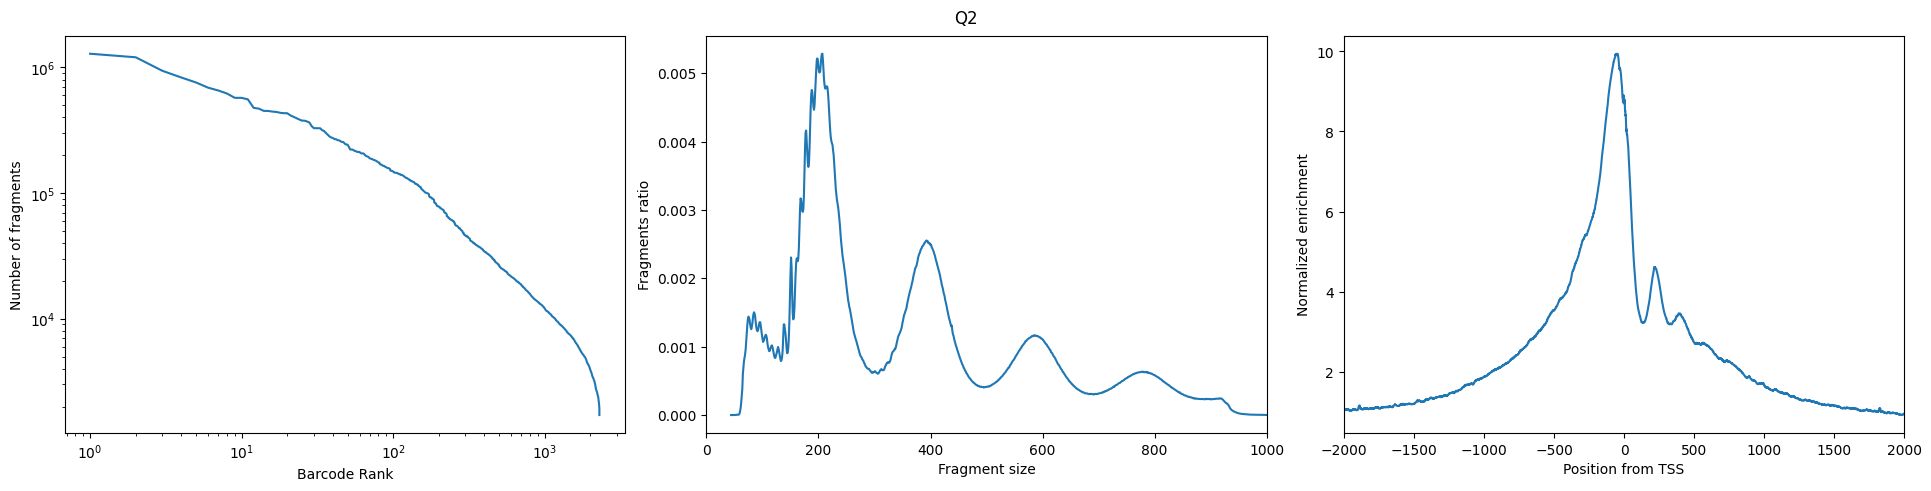

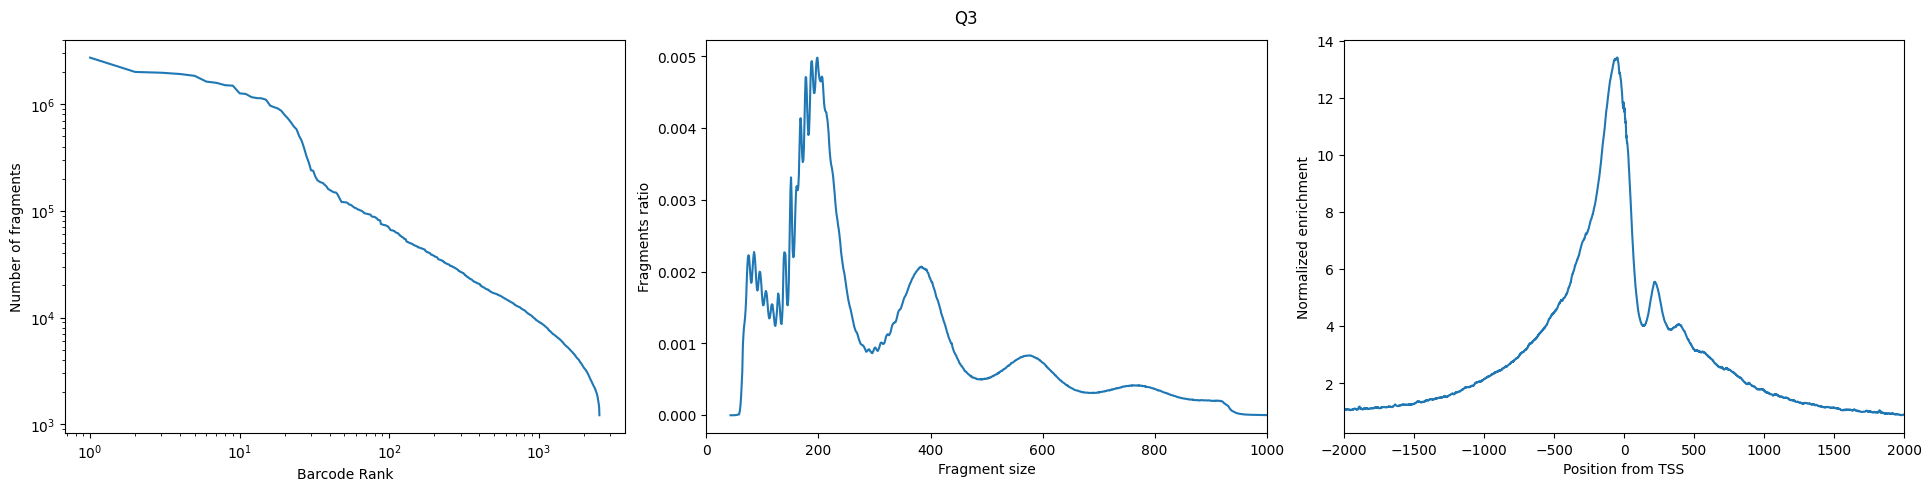

In [ ]:
for sample_id in fragments_dict:
    fig = plot_sample_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc"
    )
    fig.savefig(f"figures/{sample_id}_ATAC_QC_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig) 

In [ ]:
from pycisTopic.qc import get_barcodes_passing_qc_for_sample
sample_id_to_barcodes_passing_filters = {}
sample_id_to_thresholds = {}
for sample_id in fragments_dict:
    (
        sample_id_to_barcodes_passing_filters[sample_id],
        sample_id_to_thresholds[sample_id]
    ) = get_barcodes_passing_qc_for_sample(
            sample_id = sample_id,
            pycistopic_qc_output_dir = "outs/qc",
            unique_fragments_threshold = 1000, # use automatic thresholding when you specify None
            tss_enrichment_threshold = 10, # use automatic thresholding
            frip_threshold = 0,
            use_automatic_thresholds = True,
    )

D0:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q1:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q2:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q3:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10


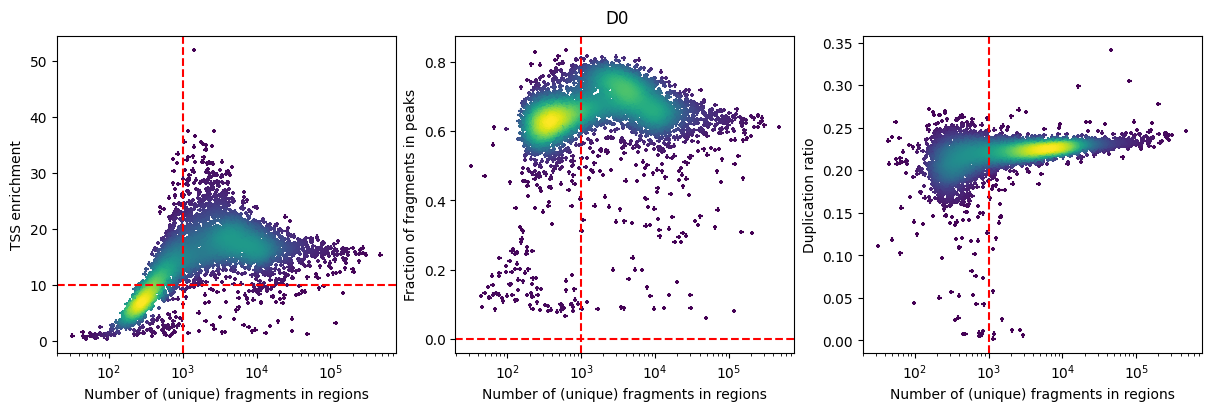

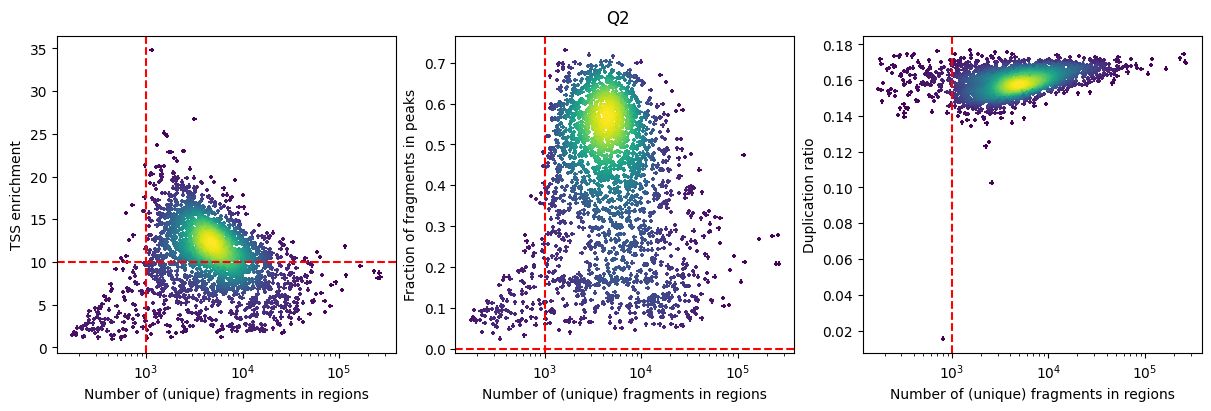

In [ ]:
for sample_id in fragments_dict:
    fig = plot_barcode_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc",
        bc_passing_filters = sample_id_to_barcodes_passing_filters[sample_id],
        detailed_title = False,
        **sample_id_to_thresholds[sample_id] 
    )
    fig.savefig(f"figures/{sample_id}_ATAC_QC_cell_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig)

# Clustering visualisation and QC visualisation

In [ ]:
import pickle
file_path = "/preprocessing/atac/outs/cistopic_obj.pkl"
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)

print(cistopic_obj)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-24 14:18:57,323	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


CistopicObject from project cisTopic_merge with n_cells × n_regions = 10268 × 190760


In [14]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 10268 × 190760


In [17]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [18]:
cistopic_obj.cell_data

barcode_rank  fraction_of_fragments_in_peaks  \
GTCTAGCTCCAGGATG-D0___D0          1403                        0.696985   
CACGGTTTCGTTAGTT-D0___D0          1118                        0.681807   
AAGTGAACATTGTGAG-D0___D0          1130                        0.720803   
AAAGGGATCGTCCTAA-D0___D0          1559                        0.714344   
ACAGCACCAAAGGTAA-D0___D0           930                        0.691150   
...                                ...                             ...   
GGAAGTAAGGTGGGAG-Q3___Q3          2361                        0.717342   
GCATTACGTAAGTGGC-Q3___Q3          2370                        0.478161   
GAGGGTGAGGTATGGT-Q3___Q3          2478                        0.680068   
TGGACCAAGGTTGTAA-Q3___Q3          2350                        0.728623   
CGGCTAGCATCCTAGT-Q3___Q3          2349                        0.595860   

                         cisTopic_nr_acc  log10_unique_fragments_count  \
GTCTAGCTCCAGGATG-D0___D0            3833                      3.763877   
CACGGTTTCGTTAGTT-D0___D0            5172                      3.910998   
AAGTGAACATTGTGAG-D0___D0            5523                      3.904391   
AAAGGGATCGTCCTAA-D0___D0            3373                      3.687886   
ACAGCACCAAAGGTAA-D0___D0            7075                      4.039850   
...                                  ...                           ...   
GGAAGTAAGGTGGGAG-Q3___Q3            1539                      3.342028   
GCATTACGTAAGTGGC-Q3___Q3             980                      3.337659   
GAGGGTGAGGTATGGT-Q3___Q3            1203                      3.247237   
TGGACCAAGGTTGTAA-Q3___Q3            1583                      3.346939   
CGGCTAGCATCCTAGT-Q3___Q3            1336                      3.346939   

                          duplication_count  tss_enrichment  \
GTCTAGCTCCAGGATG-D0___D0               1749       20.061720   
CACGGTTTCGTTAGTT-D0___D0               2353       18.499067   
AAGTGAACATTGTGAG-D0___D0               2315       17.083343   
AAAGGGATCGTCCTAA-D0___D0               1488       26.667670   
ACAGCACCAAAGGTAA-D0___D0               3157       16.882171   
...                                     ...             ...   
GGAAGTAAGGTGGGAG-Q3___Q3               1071       13.521482   
GCATTACGTAAGTGGC-Q3___Q3                905       13.003755   
GAGGGTGAGGTATGGT-Q3___Q3                877       15.620820   
TGGACCAAGGTTGTAA-Q3___Q3               1046       18.044076   
CGGCTAGCATCCTAGT-Q3___Q3                957       11.784702   

                         cisTopic_log_nr_acc  \
GTCTAGCTCCAGGATG-D0___D0            3.583539   
CACGGTTTCGTTAGTT-D0___D0            3.713659   
AAGTGAACATTGTGAG-D0___D0            3.742175   
AAAGGGATCGTCCTAA-D0___D0            3.528016   
ACAGCACCAAAGGTAA-D0___D0            3.849726   
...                                      ...   
GGAAGTAAGGTGGGAG-Q3___Q3            3.187239   
GCATTACGTAAGTGGC-Q3___Q3            2.991226   
GAGGGTGAGGTATGGT-Q3___Q3            3.080266   
TGGACCAAGGTTGTAA-Q3___Q3            3.199481   
CGGCTAGCATCCTAGT-Q3___Q3            3.125806   

                          pdf_values_for_duplication_ratio cisTopic_nr_frag  \
GTCTAGCTCCAGGATG-D0___D0                         13.634188             4309   
CACGGTTTCGTTAGTT-D0___D0                         21.064461             5971   
AAGTGAACATTGTGAG-D0___D0                         20.992568             6296   
AAAGGGATCGTCCTAA-D0___D0                          9.928649             3763   
ACAGCACCAAAGGTAA-D0___D0                         20.009237             8168   
...                                                    ...              ...   
GGAAGTAAGGTGGGAG-Q3___Q3                         10.617857             1728   
GCATTACGTAAGTGGC-Q3___Q3                          4.243089             1123   
GAGGGTGAGGTATGGT-Q3___Q3                          3.498081             1309   
TGGACCAAGGTTGTAA-Q3___Q3                         19.379643             1755   
CGGCTAGCATCCTAGT-Q3___Q3                     

In [12]:
cistopic_obj.cell_data['cell_type_all'] = cistopic_obj.cell_data['cell_type_all'].replace('Pro-B', 'Tumour', regex= True)

In [13]:
cistopic_obj.cell_data['cell_type'] = cistopic_obj.cell_data['cell_type'].replace('Pro-B', 'Tumour', regex= True)

In [14]:
color_dict_ct = { "Naive_B_cells" : "#D2AF81FF",  
  "CD16pos_NK_cells":"#a25cce",
  "Classical_monocytes":"#94ca76", 
  "Mid_erythroid" : "#daa0fd", 
  "Non-classical_monocytes" : "#357711", 
  "Tcm_Naive_helper_T_cells":"#4acabd", 
  "Tem_Trm_cytotoxic_T_cells":"#0f517e",
  "Tumour_cells_D0":"#FFA500", 
  "Tumour_cells_Q1":"#FF6347", 
  "Tumour_cells_Q2":"#DC143C",
  "Tumour_cells_Q3": "#800101"}

In [15]:
# cell_type

In [16]:
umap_coords = cistopic_obj.projections['cell']['UMAP']
cell_type = pd.DataFrame(cistopic_obj.cell_data[['sample_id','cell_type_all']])

In [ ]:
combined_df = pd.concat([umap_coords, cell_type], axis=1)
combined_df.to_csv('figures/atac_umap_coords.csv') # save the UMAP coordinates and cell types

log10_unique_fragments_count


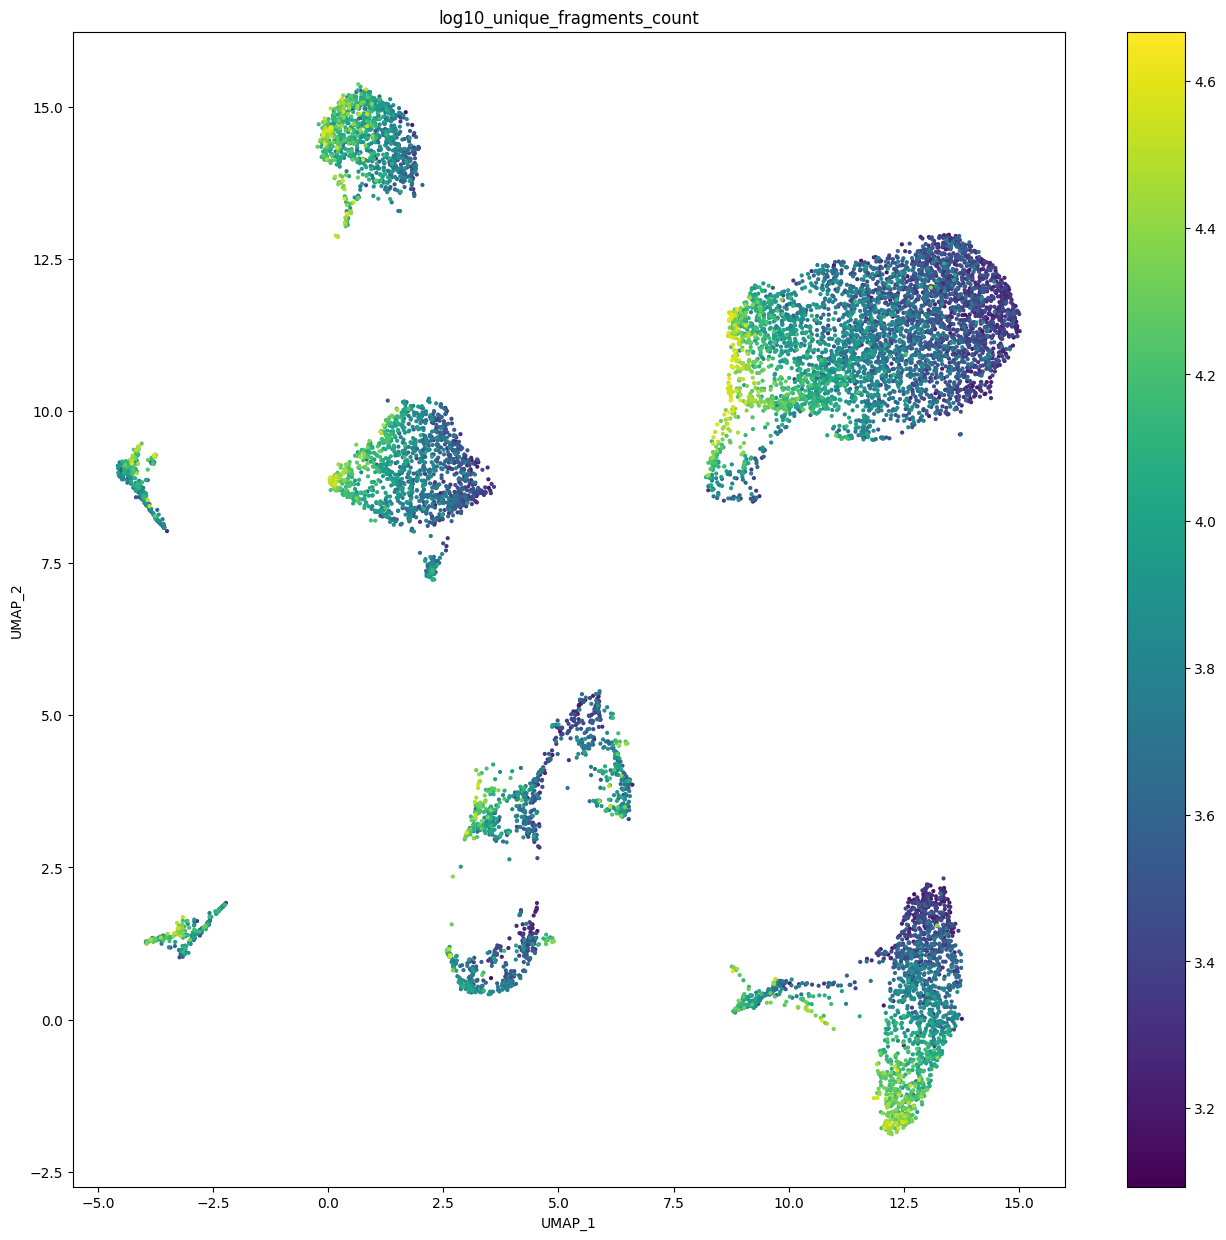

tss_enrichment


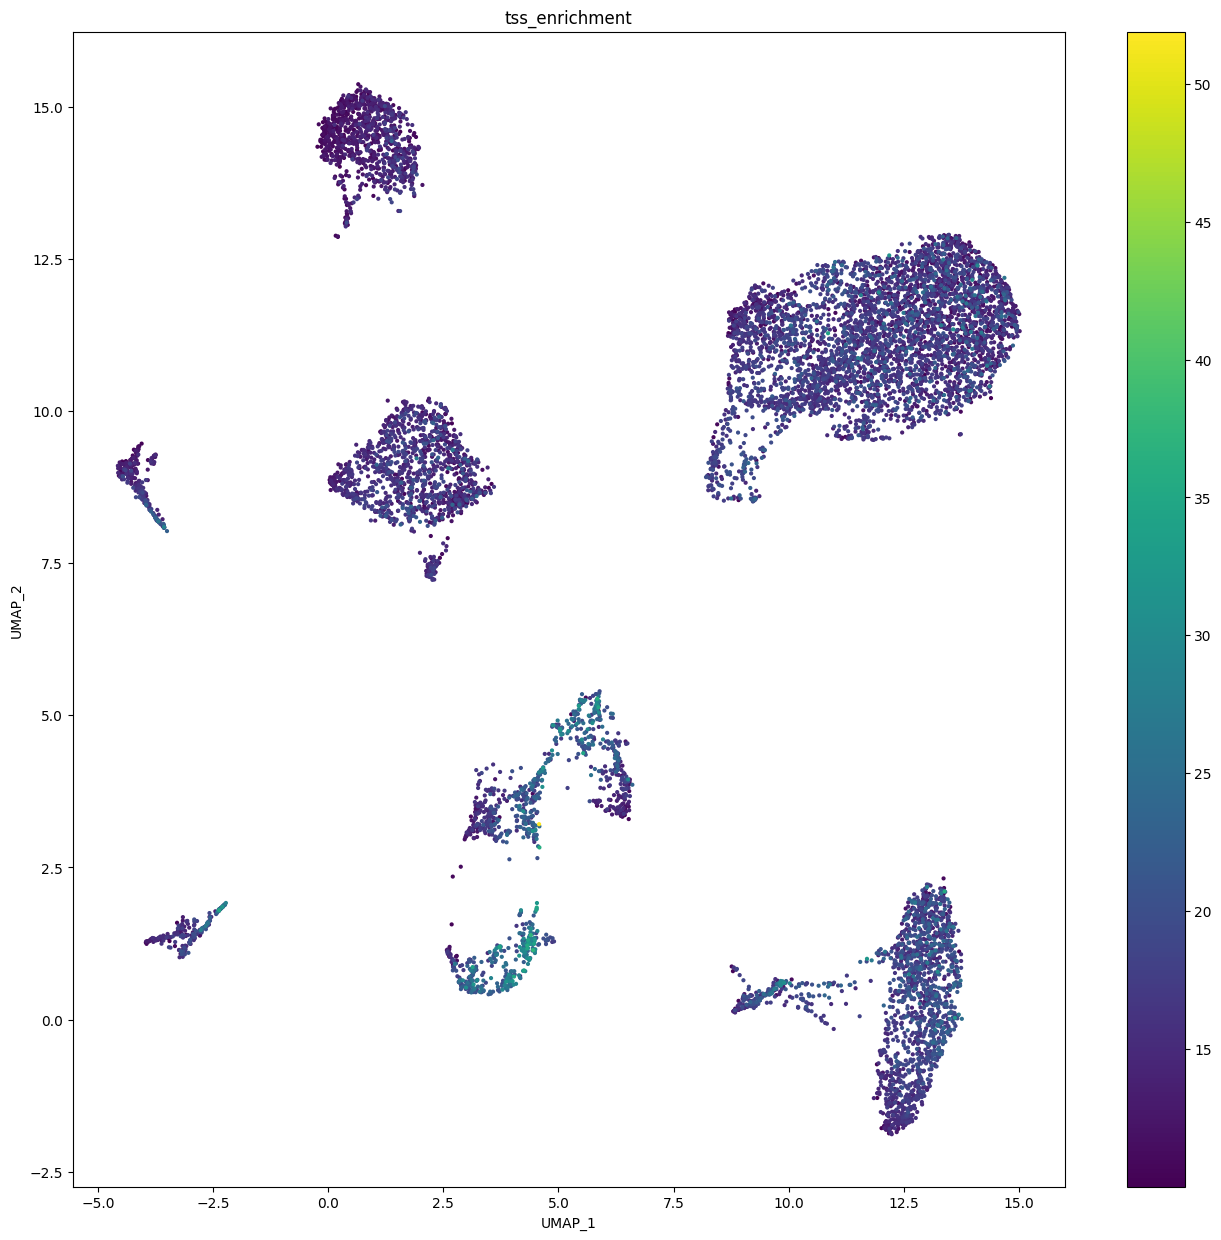

fraction_of_fragments_in_peaks


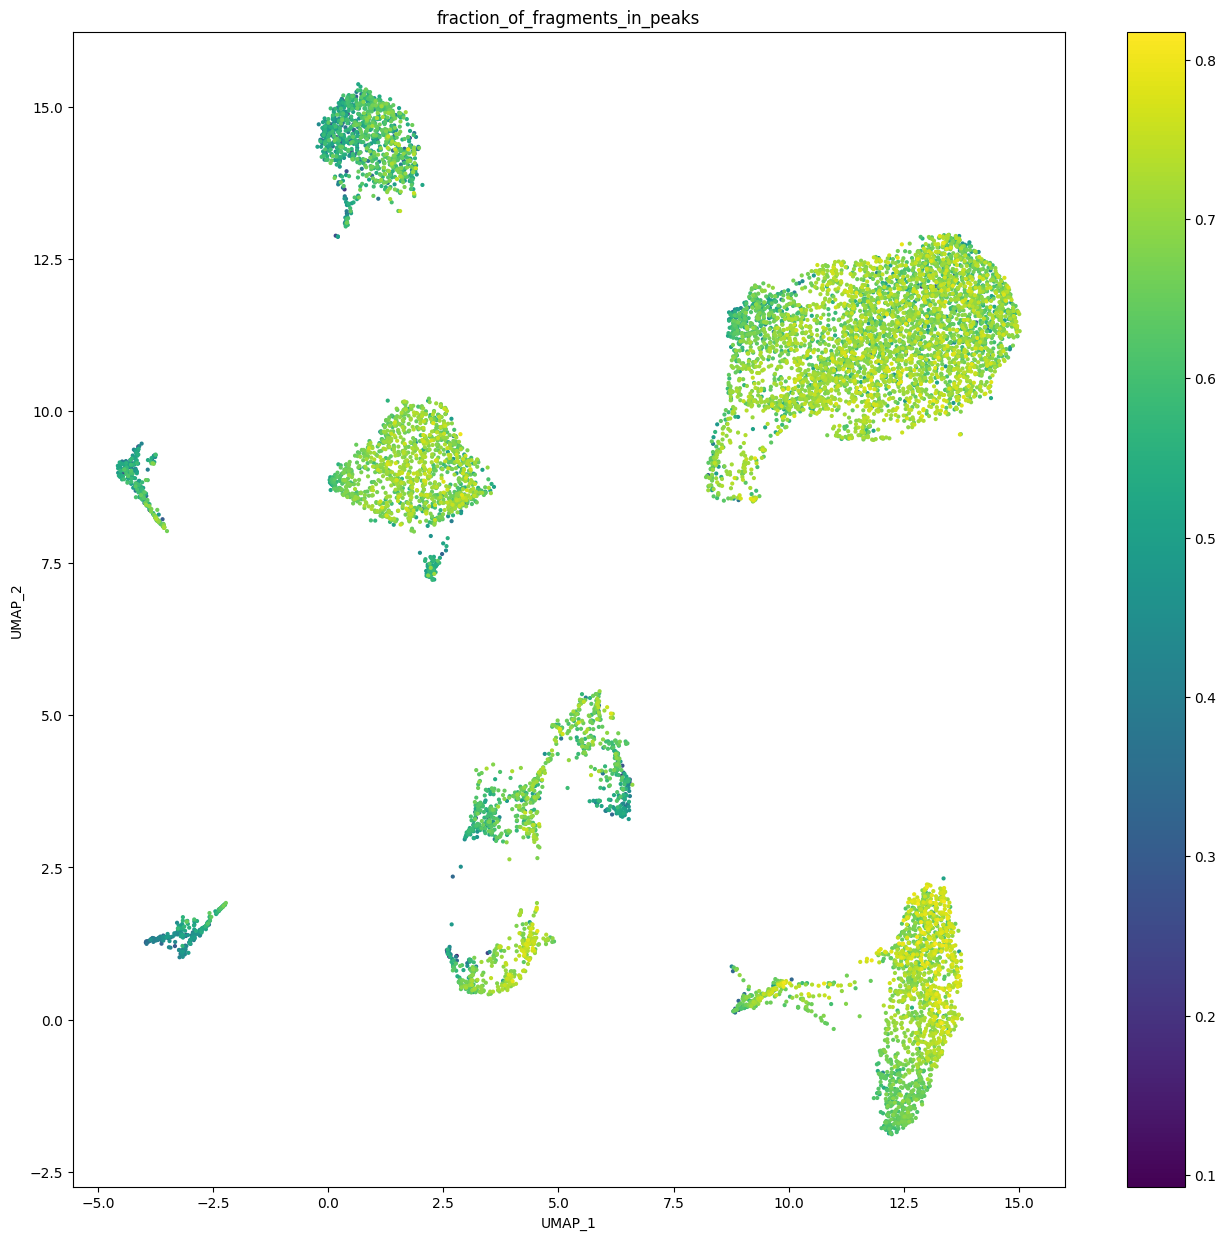

cisTopic_log_nr_frag


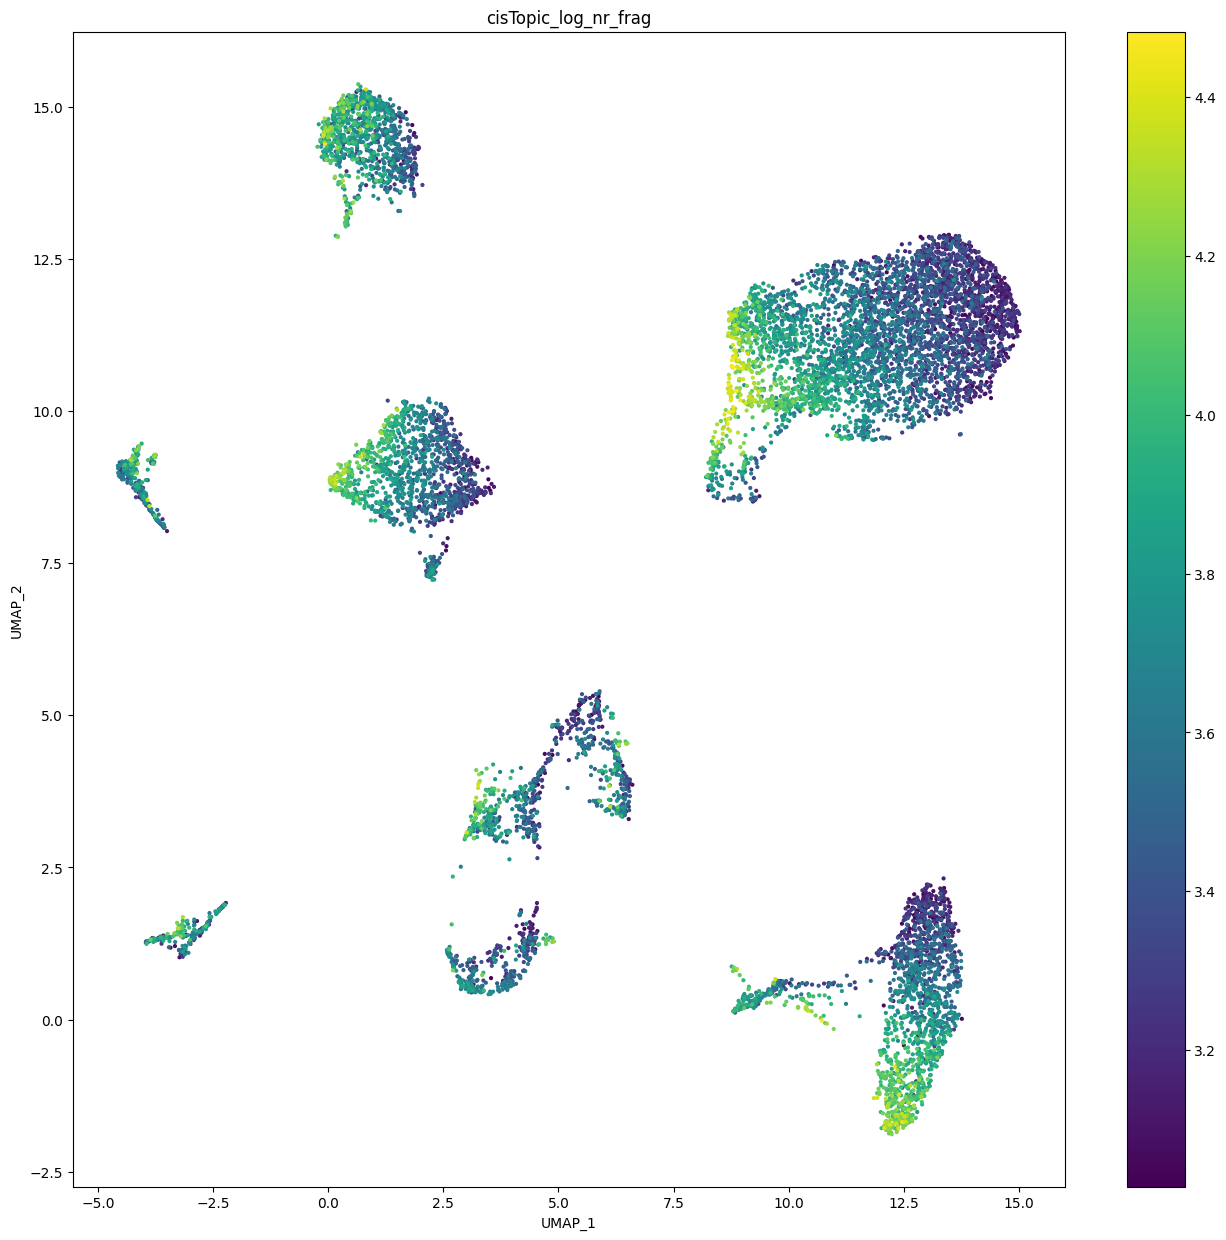

In [ ]:
for i in ['log10_unique_fragments_count', 'tss_enrichment', 'fraction_of_fragments_in_peaks', 'cisTopic_log_nr_frag']:
    print(i)
    plot_metadata(
        cistopic_obj,
        reduction_name='UMAP',
        variables= [i],
        target='cell',
        text_size=10,
        dot_size=4,
        figsize = (16,15),
        save = f"figures/atac_umap_{i}.pdf")

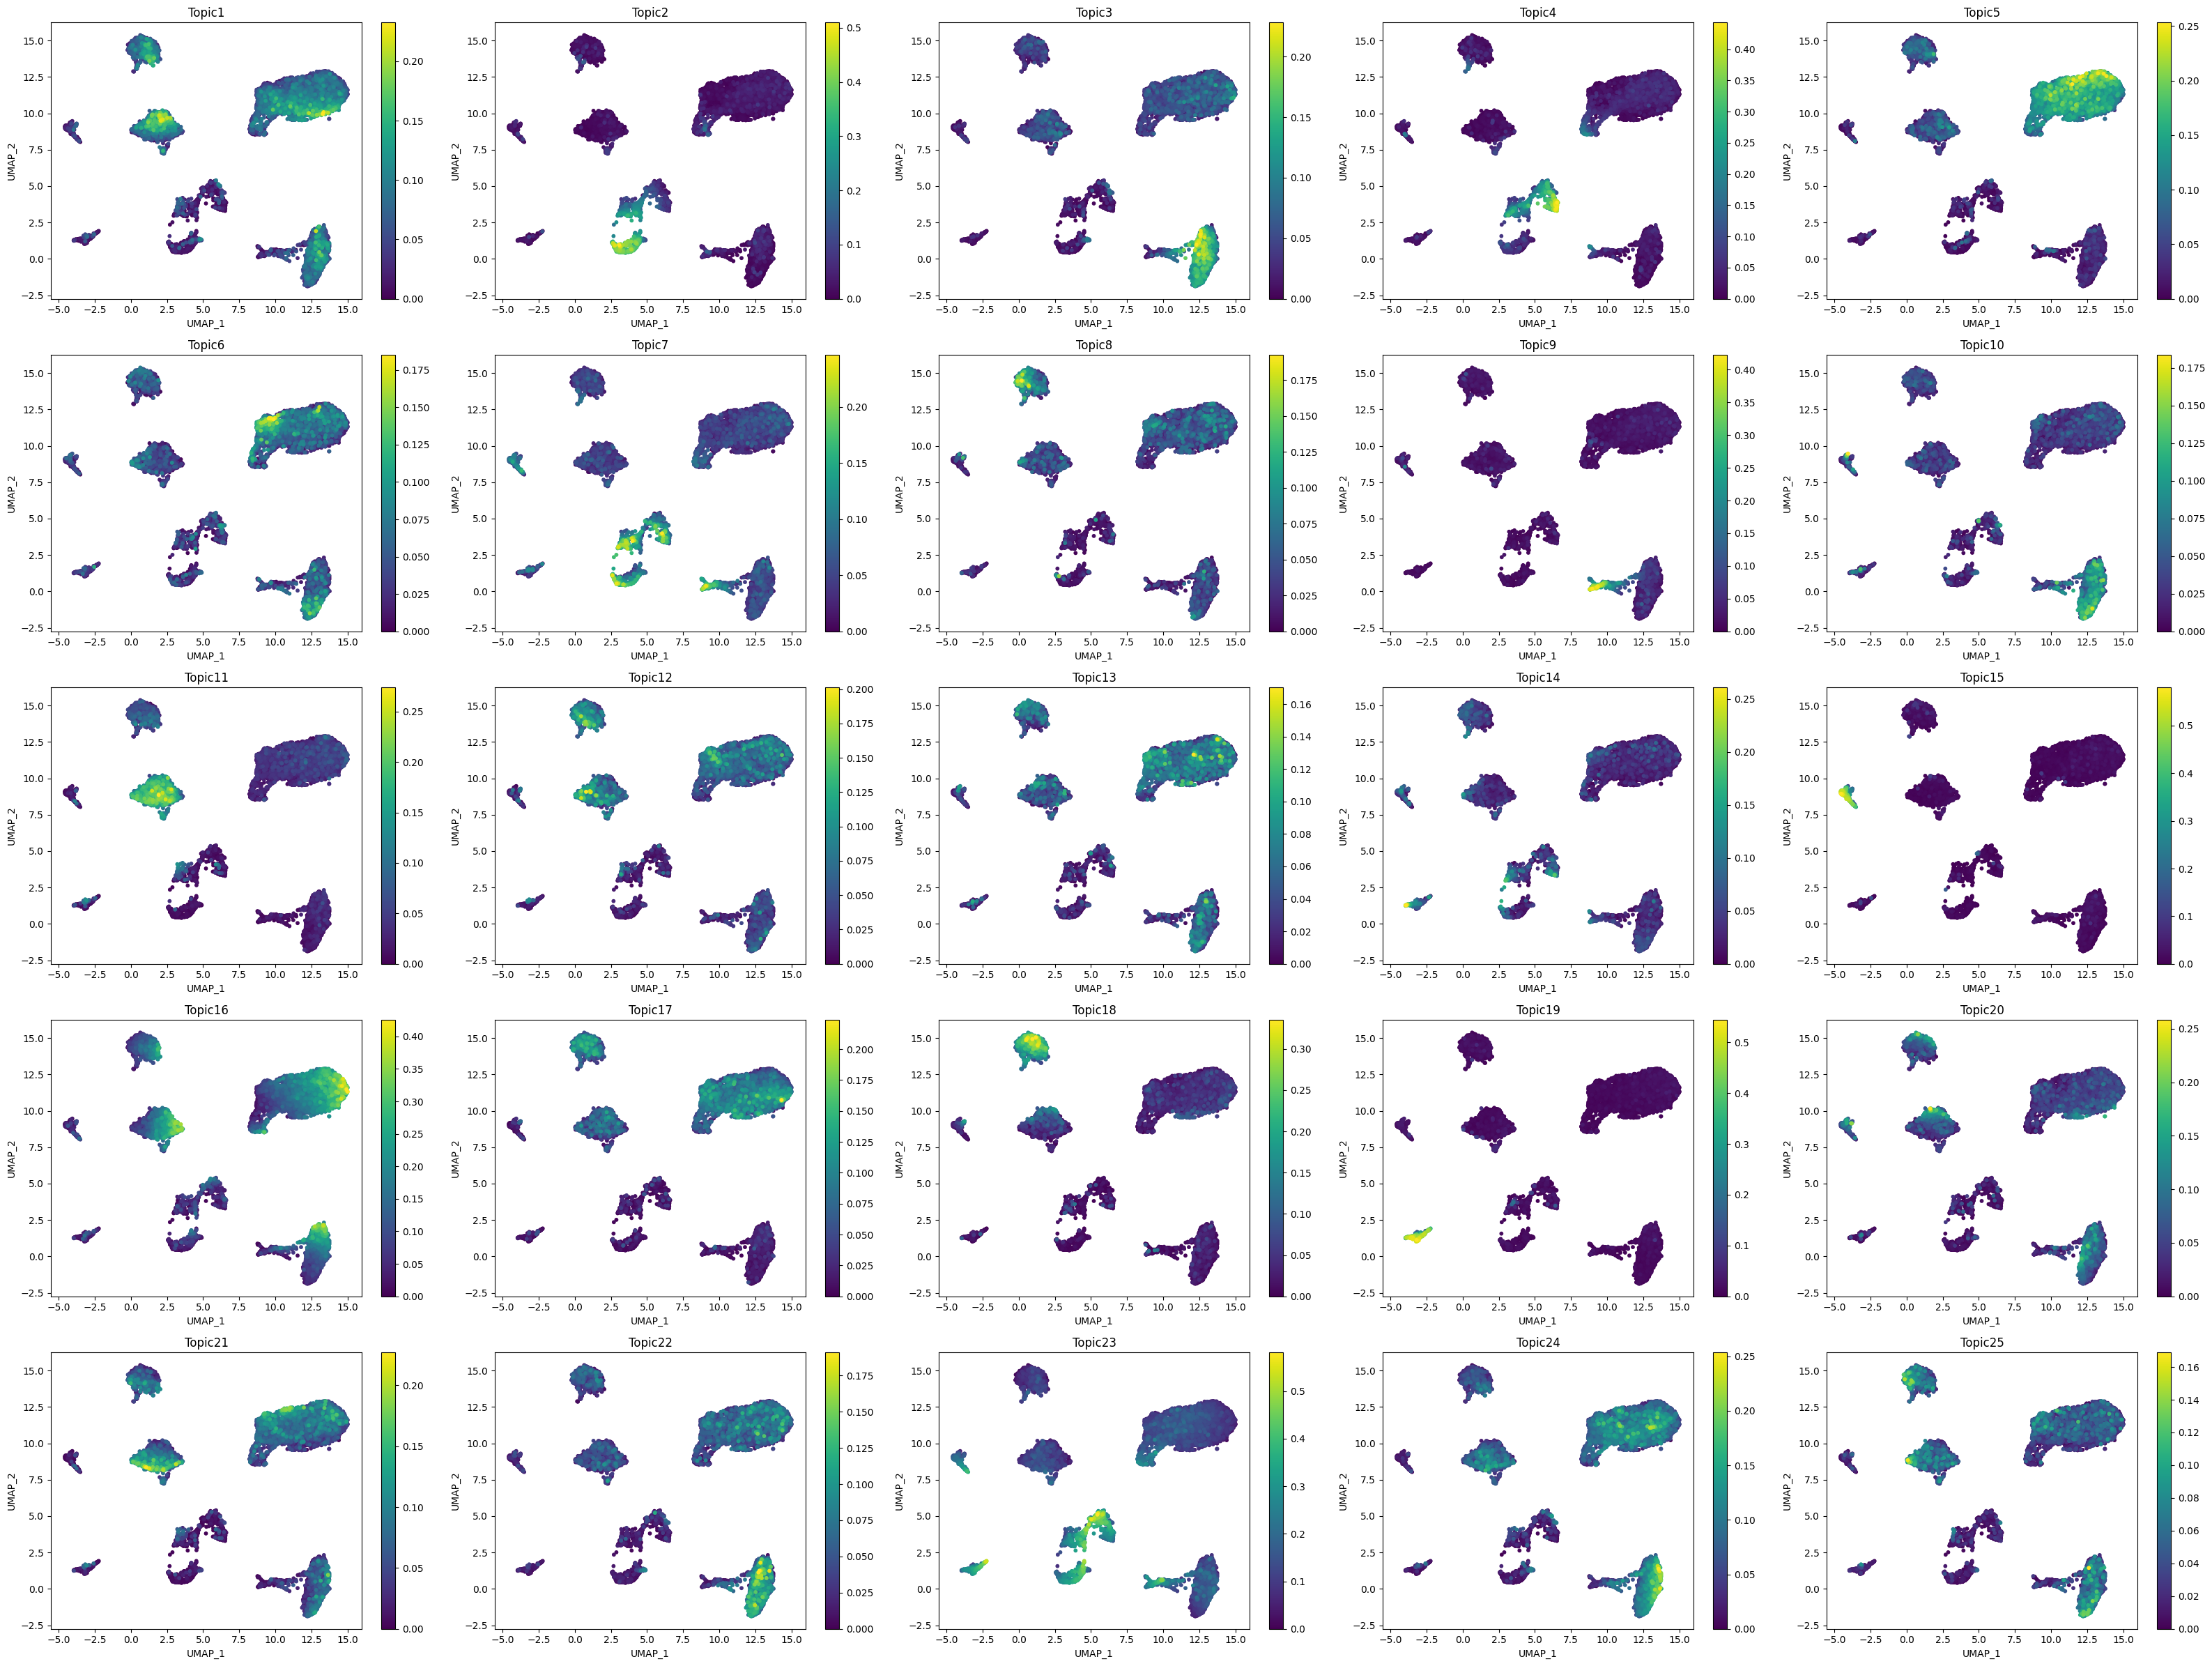

In [24]:
# cell topic contributions- 
plot_topic(
    cistopic_obj,
    reduction_name = 'UMAP',
    target = 'cell',
    num_columns=5
)

## pyCisTopic Heatmap 

In [25]:
# color_dictionary correct (in the version of pycistopic I use, color_dictionary is not properly defined)
# also 'fixing' the legend issue
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from pycisTopic.cistopic_class import CistopicObject
    
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import random
from matplotlib import cm
from typing import Optional, List, Dict, Tuple
import sklearn.preprocessing

def cell_topic_heatmap(
    cistopic_obj: 'CistopicObject',
    variables: Optional[List[str]] = None,
    remove_nan: bool = True,
    scale: bool = False,
    cluster_topics: bool = False,
    color_dictionary: Optional[Dict[str, Dict[str, str]]] = None,
    seed: int = 555,
    legend_loc_x: float = 1.2,
    legend_loc_y: float = -0.5,
    legend_dist_y: float = -1,
    figsize: Tuple[float, float] = (6.4, 4.8),
    selected_topics: Optional[List[int]] = None,
    selected_cells: Optional[List[str]] = None,
    harmony: bool = False,
    save: Optional[str] = None,
    show_legend: bool = True,  # New parameter to control legend display
):
    """
    Plot heatmap with cell-topic distributions.

    Parameters
    ----------
    cistopic_obj: `class::CistopicObject`
            A cisTopic object with a model in `class::CistopicObject.selected_model`.
    variables: list[str]
            List of variables to plot. They should be included in `class::CistopicObject.cell_data` and `class::CistopicObject.region_data`, depending on which
            target is specified.
    remove_nan: bool
            Whether to remove data points for which the variable value is 'nan'. Default: True
    scale: bool
            Whether to scale the cell-topic or topic-regions contributions prior to plotting. Default: False
    cluster_topics: bool
            Whether to cluster rows in the heatmap. Otherwise, they will be ordered based on the maximum values over the ordered cells. Default: False
    color_dictionary: dict, optional
            A dictionary containing an entry per variable, whose values are dictionaries with variable levels as keys and corresponding colors as values.
            Default: None
    seed: int
            Random seed used to select random colors. Default: 555
    legend_loc_x: float
            X location for legend. Default: 1.2
    legend_loc_y: float
            Y location for legend. Default: -0.5
    legend_dist_y: float
            Y distance between legends. Default: -1
    figsize: tuple[float, float]
            Size of the figure. Default: (6.4, 4.8)
    selected_topics: list[int], optional
            A list with selected topics to be used for plotting. Default: None (use all topics)
    selected_cells: list[str], optional
            A list with selected cells to plot. Default: None (use all cells)
    harmony: bool
            If target is 'cell', whether to use harmony processed topic contributions. Default: False
    save: str, optional
            Path to save plot. Default: None.
    show_legend: bool
            Whether to show the legend. Default: True.
    """
    model = cistopic_obj.selected_model
    cell_topic = model.cell_topic_harmony if harmony else model.cell_topic
    cell_data = cistopic_obj.cell_data

    if selected_topics is not None:
        cell_topic = cell_topic.loc[["Topic" + str(x) for x in selected_topics],]
    if selected_cells is not None:
        cell_topic = cell_topic.loc[:, selected_cells]
        cell_data = cell_data.loc[selected_cells]

    if scale:
        cell_topic = pd.DataFrame(
            sklearn.preprocessing.StandardScaler().fit_transform(cell_topic),
            index=cell_topic.index.to_list(),
            columns=cell_topic.columns,
        )

    if remove_nan and (sum(cell_data[variables].isnull().sum()) > 0):
        cell_data = cell_data[variables].dropna()
        cell_topic = cell_topic.loc[:, cell_data.index.tolist()]

    cell_topic = cell_topic.transpose()

    var = variables[0]
    var_data = cell_data.loc[:, var].sort_values()
    cell_topic = cell_topic.loc[var_data.index.to_list()]
    df = pd.concat([cell_topic, var_data], axis=1, sort=False)
    topic_order = df.groupby(var).mean().idxmax().sort_values().index.to_list()
    cell_topic = cell_topic.loc[:, topic_order].T
    # Color dict
    if color_dictionary is None:
        color_dictionary = {}

    col_colors = {}
    if variables is not None:
        for var in variables:
            var_data = cell_data.loc[:, var].sort_values()
            categories = set(var_data)

            if var not in color_dictionary:
                random.seed(seed)
                color = [
                    mcolors.to_rgb("#" + "%06x" % random.randint(0, 0xFFFFFF))
                    for i in range(len(categories))
                ]
                color_dict = dict(zip(categories, color))
                color_dictionary[var] = color_dict
            col_colors[var] = var_data.map(color_dictionary[var])
        col_colors = pd.concat(
            [col_colors[var] for var in variables], axis=1, sort=False
        )

        g = sns.clustermap(
            cell_topic,
            row_cluster=cluster_topics,
            col_cluster=False,
            col_colors=col_colors,
            cmap=cm.viridis,
            xticklabels=False,
            figsize=figsize,
        )

        if show_legend:
            cbar = g.cax
            cbar.set_position([legend_loc_x, 0.55, 0.05, 0.2])
            g.ax_col_dendrogram.set_visible(False)
            g.ax_row_dendrogram.set_visible(False)

            pos = legend_loc_y
            for key in color_dictionary:
                patchList = []
                for subkey in color_dictionary[key]:
                    data_key = mpatches.Patch(
                        color=color_dictionary[key][subkey], label=subkey
                    )
                    patchList.append(data_key)
                legend = plt.legend(
                    handles=patchList,
                    bbox_to_anchor=(0, pos),
                    frameon=False,
                    loc="center",
                    title=key,
                )
                ax = plt.gca().add_artist(legend)
                pos += legend_dist_y
    else:
        g = sns.clustermap(
            cell_topic,
            row_cluster=cluster_topics,
            col_cluster=True,
            cmap=cm.viridis,
            xticklabels=False,
            figsize=figsize,
        )

    if save is not None:
        g.savefig(save, bbox_inches="tight")
    plt.show()

In [27]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['cell_type_all', 'sample_id'],
    color_dictionary = {"cell_type_all":{ "Naive_B_cells" : "#D2AF81FF",  
  "CD16pos_NK_cells":"#a25cce",
  "Classical_monocytes":"#94ca76", 
 "Mid_erythroid" : "#daa0fd", 
 "Non-classical_monocytes" : "#357711", 
  "Tcm_Naive_helper_T_cells":"#4acabd", 
  "Tem_Trm_cytotoxic_T_cells":"#0f517e",
  "Tumour_cells_D0":"#FFA500", 
  "Tumour_cells_Q1":"#FF6347", 
  "Tumour_cells_Q2":"#DC143C",
  "Tumour_cells_Q3": "#800101"},"sample_id":{"D0": "#fac710",
	"Q1" : "#709AE1FF",
	"Q2" :"#8f18c7",
	"Q3" : "#977140"}},
    scale = True,
    cluster_topics = True,
  #  legend_loc_x = 1,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10),
    save = ('figures/heatmap_pycistopic_scaled.pdf')
)

/opt/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


/opt/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


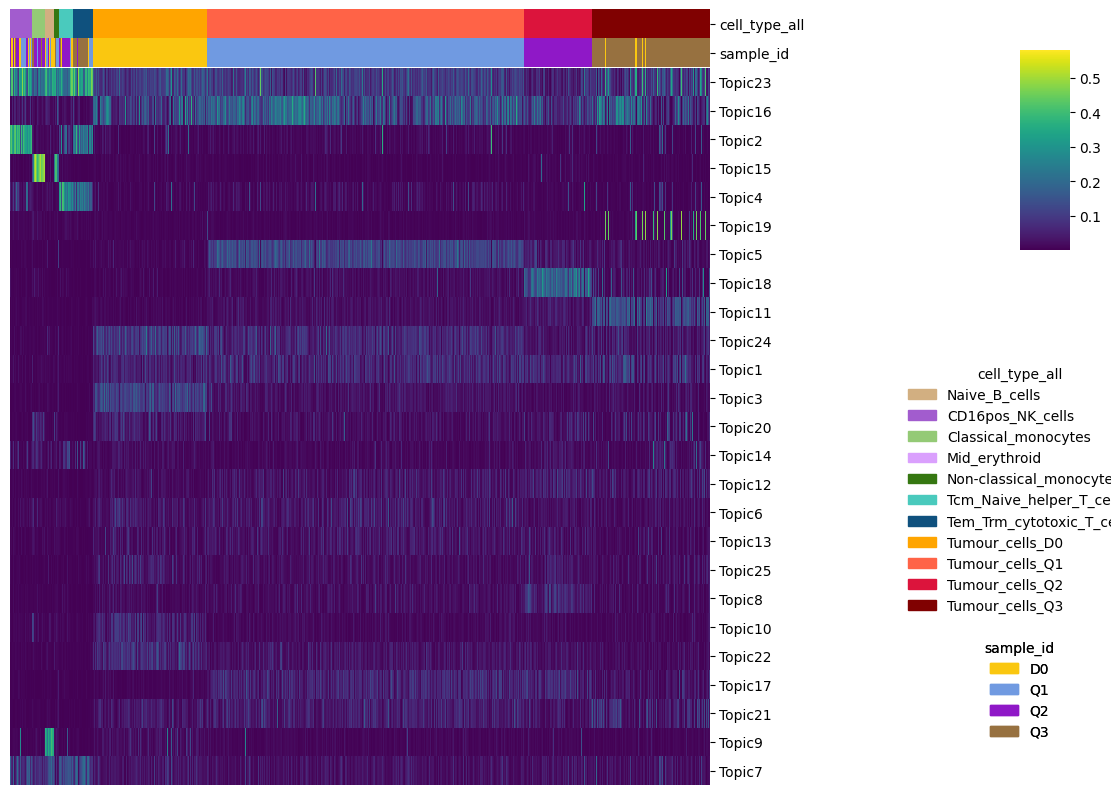

In [28]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['cell_type_all', 'sample_id'],
    color_dictionary = {"cell_type_all":{ "Naive_B_cells" : "#D2AF81FF",  
  "CD16pos_NK_cells":"#a25cce",
  "Classical_monocytes":"#94ca76", 
  "Mid_erythroid" : "#daa0fd", 
  "Non-classical_monocytes" : "#357711", 
  "Tcm_Naive_helper_T_cells":"#4acabd", 
  "Tem_Trm_cytotoxic_T_cells":"#0f517e",
  "Tumour_cells_D0":"#FFA500", 
  "Tumour_cells_Q1":"#FF6347", 
  "Tumour_cells_Q2":"#DC143C",
  "Tumour_cells_Q3": "#800101"},"sample_id":{"D0": "#fac710",
	"Q1" : "#709AE1FF",
	"Q2" :"#8f18c7",
	"Q3" : "#977140"}},
   # scale = True,
    cluster_topics = True,
  #  legend_loc_x = 1,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10),
    save = ('figures/heatmap_pycistopic_not_scaled.pdf')
)

In [29]:
model = cistopic_obj.selected_model
cell_topic =  model.cell_topic
cell_topic.T

Topic1    Topic2    Topic3    Topic4    Topic5  \
GTCTAGCTCCAGGATG-D0___D0  0.000773  0.032707  0.003348  0.027814  0.003348   
CACGGTTTCGTTAGTT-D0___D0  0.058981  0.001915  0.157411  0.008809  0.023554   
AAGTGAACATTGTGAG-D0___D0  0.088462  0.002871  0.130989  0.005921  0.000897   
AAAGGGATCGTCCTAA-D0___D0  0.005843  0.376570  0.009349  0.026585  0.001169   
ACAGCACCAAAGGTAA-D0___D0  0.086596  0.002947  0.099789  0.018667  0.019228   
...                            ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  0.063562  0.007552  0.070485  0.004405  0.022026   
GCATTACGTAAGTGGC-Q3___Q3  0.013592  0.020388  0.004854  0.235922  0.005825   
GAGGGTGAGGTATGGT-Q3___Q3  0.047087  0.008779  0.003990  0.007981  0.019154   
TGGACCAAGGTTGTAA-Q3___Q3  0.031231  0.012860  0.028781  0.011023  0.046540   
CGGCTAGCATCCTAGT-Q3___Q3  0.053391  0.005772  0.026696  0.001443  0.040404   

                            Topic6    Topic7    Topic8    Topic9   Topic10  \
GTCTAGCTCCAGGATG-D0___D0  0.001803  0.151172  0.001288  0.402009  0.004378   
CACGGTTTCGTTAGTT-D0___D0  0.060130  0.009575  0.008043  0.007660  0.038491   
AAGTGAACATTGTGAG-D0___D0  0.036067  0.029966  0.004486  0.013458  0.056702   
AAAGGGATCGTCCTAA-D0___D0  0.013146  0.125037  0.007596  0.003214  0.003214   
ACAGCACCAAAGGTAA-D0___D0  0.053895  0.076632  0.001684  0.013474  0.071860   
...                            ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  0.009440  0.018880  0.026432  0.016992  0.015104   
GCATTACGTAAGTGGC-Q3___Q3  0.008738  0.035922  0.008738  0.015534  0.004854   
GAGGGTGAGGTATGGT-Q3___Q3  0.015962  0.013567  0.030327  0.051875  0.011971   
TGGACCAAGGTTGTAA-Q3___Q3  0.003674  0.012247  0.015309  0.018371  0.004899   
CGGCTAGCATCCTAGT-Q3___Q3  0.004329  0.011544  0.012987  0.010101  0.009380   

                          ...   Topic16   Topic17   Topic18   Topic19  \
GTCTAGCTCCAGGATG-D0___D0  ...  0.016482  0.001545  0.002575  0.001545   
CACGGTTTCGTTAGTT-D0___D0  ...  0.115282  0.012256  0.017809  0.004021   
AAGTGAACATTGTGAG-D0___D0  ...  0.083259  0.006998  0.014534  0.010407   
AAAGGGATCGTCCTAA-D0___D0  ...  0.014023  0.000584  0.000584  0.001461   
ACAGCACCAAAGGTAA-D0___D0  ...  0.065684  0.007439  0.006596  0.005614   
...                       ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  ...  0.208307  0.062933  0.004405  0.004405   
GCATTACGTAAGTGGC-Q3___Q3  ...  0.084466  0.003883  0.002913  0.010680   
GAGGGTGAGGTATGGT-Q3___Q3  ...  0.255387  0.023943  0.025539  0.007981   
TGGACCAAGGTTGTAA-Q3___Q3  ...  0.252296  0.118800  0.117575  0.004899   
CGGCTAGCATCCTAGT-Q3___Q3  ...  0.311688  0.022367  0.018038  0.012266   

                           Topic20   Topic21   Topic22   Topic23   Topic24  \
GTCTAGCTCCAGGATG-D0___D0  0.003605  0.002318  0.001288  0.296935  0.004378   
CACGGTTTCGTTAGTT-D0___D0  0.033895  0.045959  0.065875  0.115473  0.132708   
AAGTGAACATTGTGAG-D0___D0  0.152342  0.011125  0.070877  0.099767  0.060650   
AAAGGGATCGTCCTAA-D0___D0  0.007888  0.003506  0.005259  0.341513  0.001169   
ACAGCACCAAAGGTAA-D0___D0  0.042667  0.037895  0.067088  0.090246  0.118596   
...                            ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  0.032096  0.032096  0.008181  0.102580  0.040906   
GCATTACGTAAGTGGC-Q3___Q3  0.014563  0.002913  0.001942  0.434951  0.014563   
GAGGGTGAGGTATGGT-Q3___Q3  0.082203  0.007981  0.032721  0.036712  0.026337   
TGGACCAAGGTTGTAA-Q3___Q3  0.022658  0.050214  0.028781  0.007961  0.020208   
CGGCTAGCATCCTAGT-Q3___Q3  0.024531  0.176046  0.045455  0.022367  0.021645   

                           Topic25  
GTCTAGCTCCAGGATG-D0___D0  0.003863  
CACGGTTTCGTTAGTT-D0___D0  0.011490  
AAGTGAACATTGTGAG-D0___D0  0.051319  
AAAGGGATCGTCCTAA-D0___D0  0.012854  
ACAGCACCAAAGGTAA-D0___D0  0.027649  
...                            ...  
GGAAGTAAGGTGGGAG-Q3___Q3  0.005664  
GCATTACGTAAGTGGC-Q3___Q3  0.004854  
GAGGGTG

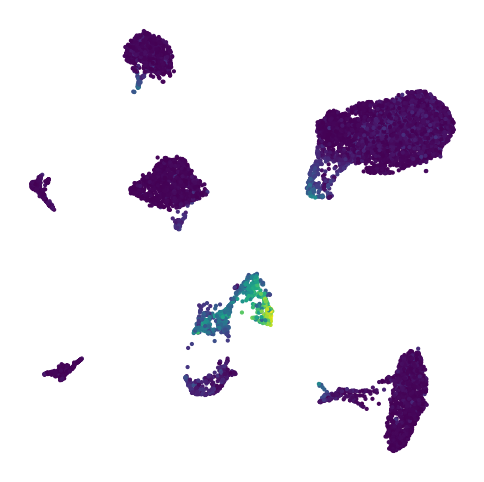

In [30]:
umap_coords = cistopic_obj.projections['cell']['UMAP']
#cell_type = pd.DataFrame(cistopic_obj.cell_data[attribute])
#cell_type['color'] = cell_type[attribute].map(color_dict).fillna('grey')
plt.figure(figsize=(6, 6)) 

plt.scatter(x = umap_coords['UMAP_1'], y = umap_coords['UMAP_2'], c=cell_topic.T['Topic4'], s = 4)
# handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=label)
#            for label, color in color_dict.items()]
# plt.legend(handles=handles, title=attribute, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.axis('off') 
plt.gca().set_frame_on(False)
plt.show()

# DAR

Visualising number of DARs

2025-07-15 22:33:13,931 cisTopic     INFO     Imputing region accessibility
2025-07-15 22:33:13,932 cisTopic     INFO     Impute region accessibility for regions 0-20000
2025-07-15 22:33:14,991 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2025-07-15 22:33:16,029 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2025-07-15 22:33:17,056 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2025-07-15 22:33:18,069 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2025-07-15 22:33:19,083 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2025-07-15 22:33:20,095 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2025-07-15 22:33:21,102 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2025-07-15 22:33:22,109 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2025-07-15 22:33:23,118 cisTopic     

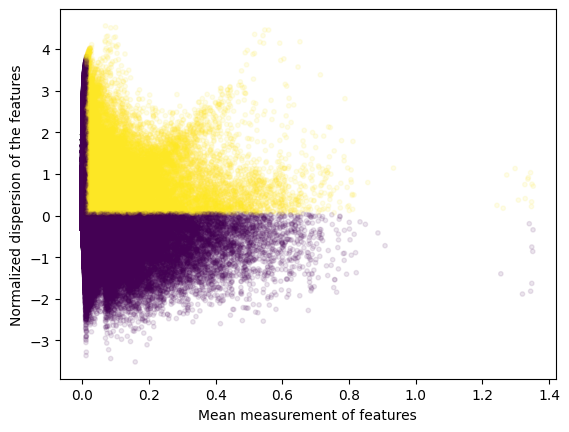

2025-07-15 22:33:51,238 cisTopic     INFO     Done!


2025-07-15 22:33:56,430	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-15 22:33:57,493 cisTopic     INFO     Subsetting data for CD16pos_NK_cells (317 of 10268)
2025-07-15 22:34:02,523 cisTopic     INFO     Computing p-value for CD16pos_NK_cells
2025-07-15 22:34:10,434 cisTopic     INFO     Computing log2FC for CD16pos_NK_cells
2025-07-15 22:34:12,681 cisTopic     INFO     CD16pos_NK_cells done!
2025-07-15 22:34:12,692 cisTopic     INFO     Subsetting data for Classical_monocytes (190 of 10268)
2025-07-15 22:34:12,991 cisTopic     INFO     Computing p-value for Classical_monocytes
2025-07-15 22:34:20,011 cisTopic     INFO     Computing log2FC for Classical_monocytes
2025-07-15 22:34:20,136 cisTopic     INFO     Classical_monocytes done!
2025-07-15 22:34:20,146 cisTopic     INFO     Subsetting data for Naive_B_cells (134 of 10268)
2025-07-15 22:34:20,325 cisTopic     INFO     Computing p-value for Naive_B_cells


In [ ]:
# DAR plotting

from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np
imputed_acc_obj = impute_accessibility(
    cistopic_obj,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='cell_type_all',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/ray_spill',
    split_pattern = '-'
)

2025-07-10 13:08:56,846 fontTools.subset INFO     maxp pruned
2025-07-10 13:08:56,855 fontTools.subset INFO     cmap pruned
2025-07-10 13:08:56,856 fontTools.subset INFO     kern dropped
2025-07-10 13:08:56,856 fontTools.subset INFO     post pruned
2025-07-10 13:08:56,856 fontTools.subset INFO     FFTM dropped
2025-07-10 13:08:56,860 fontTools.subset INFO     GPOS pruned
2025-07-10 13:08:56,864 fontTools.subset INFO     GSUB pruned
2025-07-10 13:08:56,871 fontTools.subset INFO     glyf pruned
2025-07-10 13:08:56,872 fontTools.subset INFO     Added gid0 to subset
2025-07-10 13:08:56,872 fontTools.subset INFO     Added first four glyphs to subset
2025-07-10 13:08:56,872 fontTools.subset INFO     Closing glyph list over 'GSUB': 41 glyphs before
2025-07-10 13:08:56,873 fontTools.subset INFO     Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'K', 'N', 'Q', 'R', 'T', 'a', 'b', 'c', 'e', 'eight', 'f', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 

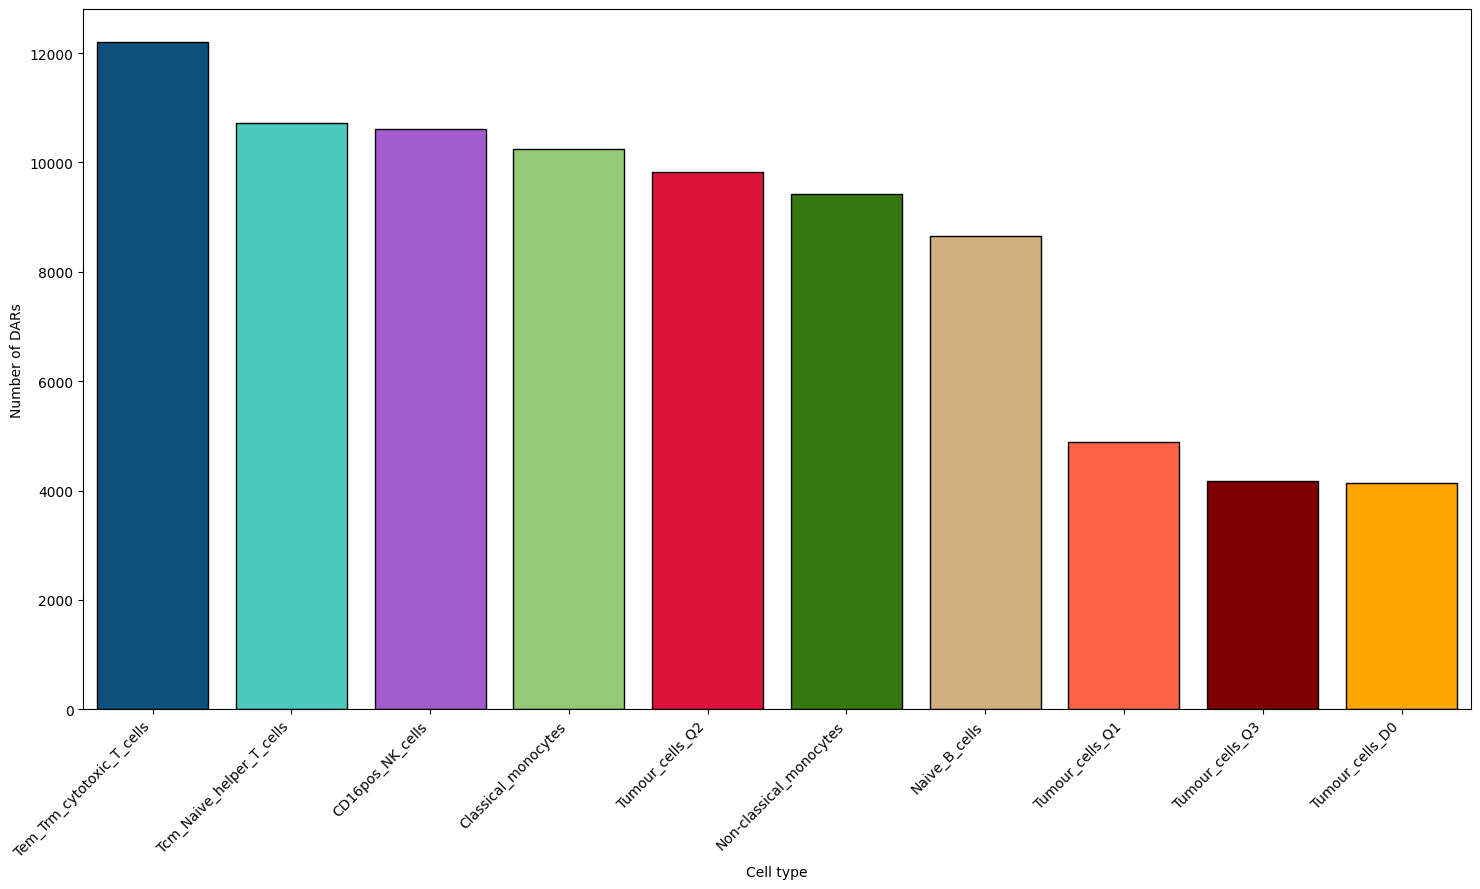

In [33]:
categories = list(markers_dict.keys())
counts = [len(markers_dict[x]) for x in markers_dict]  


sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories, counts = zip(*sorted_data) 
colors = [color_dict_ct[cat] for cat in categories]

plt.figure(figsize=(15, 9))
plt.bar(categories, counts, color=colors, edgecolor='black')


plt.xlabel('Cell type')
plt.ylabel('Number of DARs')
plt.title('')
plt.xticks(rotation = 45, ha = 'right')
plt.xlim(-0.5, len(categories) - 0.5) 

plt.tight_layout()

plt.savefig('figures/DAR_atac.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [34]:
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

  CD16pos_NK_cells: 10613
  Classical_monocytes: 10248
  Naive_B_cells: 8663
  Non-classical_monocytes: 9432
  Tcm_Naive_helper_T_cells: 10715
  Tem_Trm_cytotoxic_T_cells: 12196
  Tumour_cells_D0: 4147
  Tumour_cells_Q1: 4880
  Tumour_cells_Q2: 9825
  Tumour_cells_Q3: 4181


In [35]:
sum(len(markers_dict[x]) for x in markers_dict) # number of DARs

84900

# Gene activity prediction


In [ ]:
import pyranges as pr
from pycisTopic.gene_activity import get_gene_activity

In [ ]:
chromsizes = pd.read_table(os.path.join("preprocessing/atac","outs", "qc", "hg38.chrom_sizes_and_alias.tsv"))
chromsizes

In [ ]:
chromsizes.rename({"# ucsc": "Chromosome", "length": "End"}, axis = 1, inplace = True)
chromsizes["Start"] = 0
chromsizes = pr.PyRanges(chromsizes[["Chromosome", "Start", "End"]])

In [ ]:
pr_annotation = pd.read_table(
        os.path.join("/preprocessing/atac","outs", "qc", "tss.bed")
    ).rename(
        {"Name": "Gene", "# Chromosome": "Chromosome"}, axis = 1)
pr_annotation["Transcription_Start_Site"] = pr_annotation["Start"]
pr_annotation = pr.PyRanges(pr_annotation)
pr_annotation

In [ ]:
gene_act, weigths = get_gene_activity(
    imputed_acc_obj,
    pr_annotation,
    chromsizes,
    use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
    upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it
                             # these bp will be taken (1kbp here)
    downstream=[1000,100000], # Search space downstream
    distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
    decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
    extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for
                          #this weight)
    extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
    gene_size_weight=False, # Whether to add a weights based on the length of the gene
    gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                          #in the genome
    remove_promoters=False, # Whether to remove promoters when computing gene activity scores
    average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene
                          #activity score
    scale_factor=1, # Value to multiply for the final gene activity matrix
    extend_tss=[10,10], # Space to consider a promoter
    gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
    return_weights= True, # Whether to return the final weights
    project='Gene_activity') # Project name for the gene activity object

In [ ]:
DAG_markers_dict= find_diff_features(
    cistopic_obj,
    gene_act,
    variable='cell_type_all',
    var_features=None,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=15,
    _temp_dir='/ray_spill',
    split_pattern = '-')

2025-07-10 13:12:08,884	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-10 13:12:09,982 cisTopic     INFO     Subsetting data for CD16pos_NK_cells (317 of 10268)
2025-07-10 13:12:12,622 cisTopic     INFO     Computing p-value for CD16pos_NK_cells
2025-07-10 13:12:17,143 cisTopic     INFO     Computing log2FC for CD16pos_NK_cells
2025-07-10 13:12:18,704 cisTopic     INFO     CD16pos_NK_cells done!
2025-07-10 13:12:18,711 cisTopic     INFO     Subsetting data for Classical_monocytes (190 of 10268)
2025-07-10 13:12:18,812 cisTopic     INFO     Computing p-value for Classical_monocytes
2025-07-10 13:12:22,203 cisTopic     INFO     Computing log2FC for Classical_monocytes
2025-07-10 13:12:22,239 cisTopic     INFO     Classical_monocytes done!
2025-07-10 13:12:22,246 cisTopic     INFO     Subsetting data for Naive_B_cells (134 of 10268)
2025-07-10 13:12:22,294 cisTopic     INFO     Computing p-value for Naive_B_cells
2025-07-10 13:12:25,801 cisTopic     INFO     Computing log2FC for Naive_B_cells
2025-07-10 13:12:25,827 cisTopic     INFO     Naive_B_cell

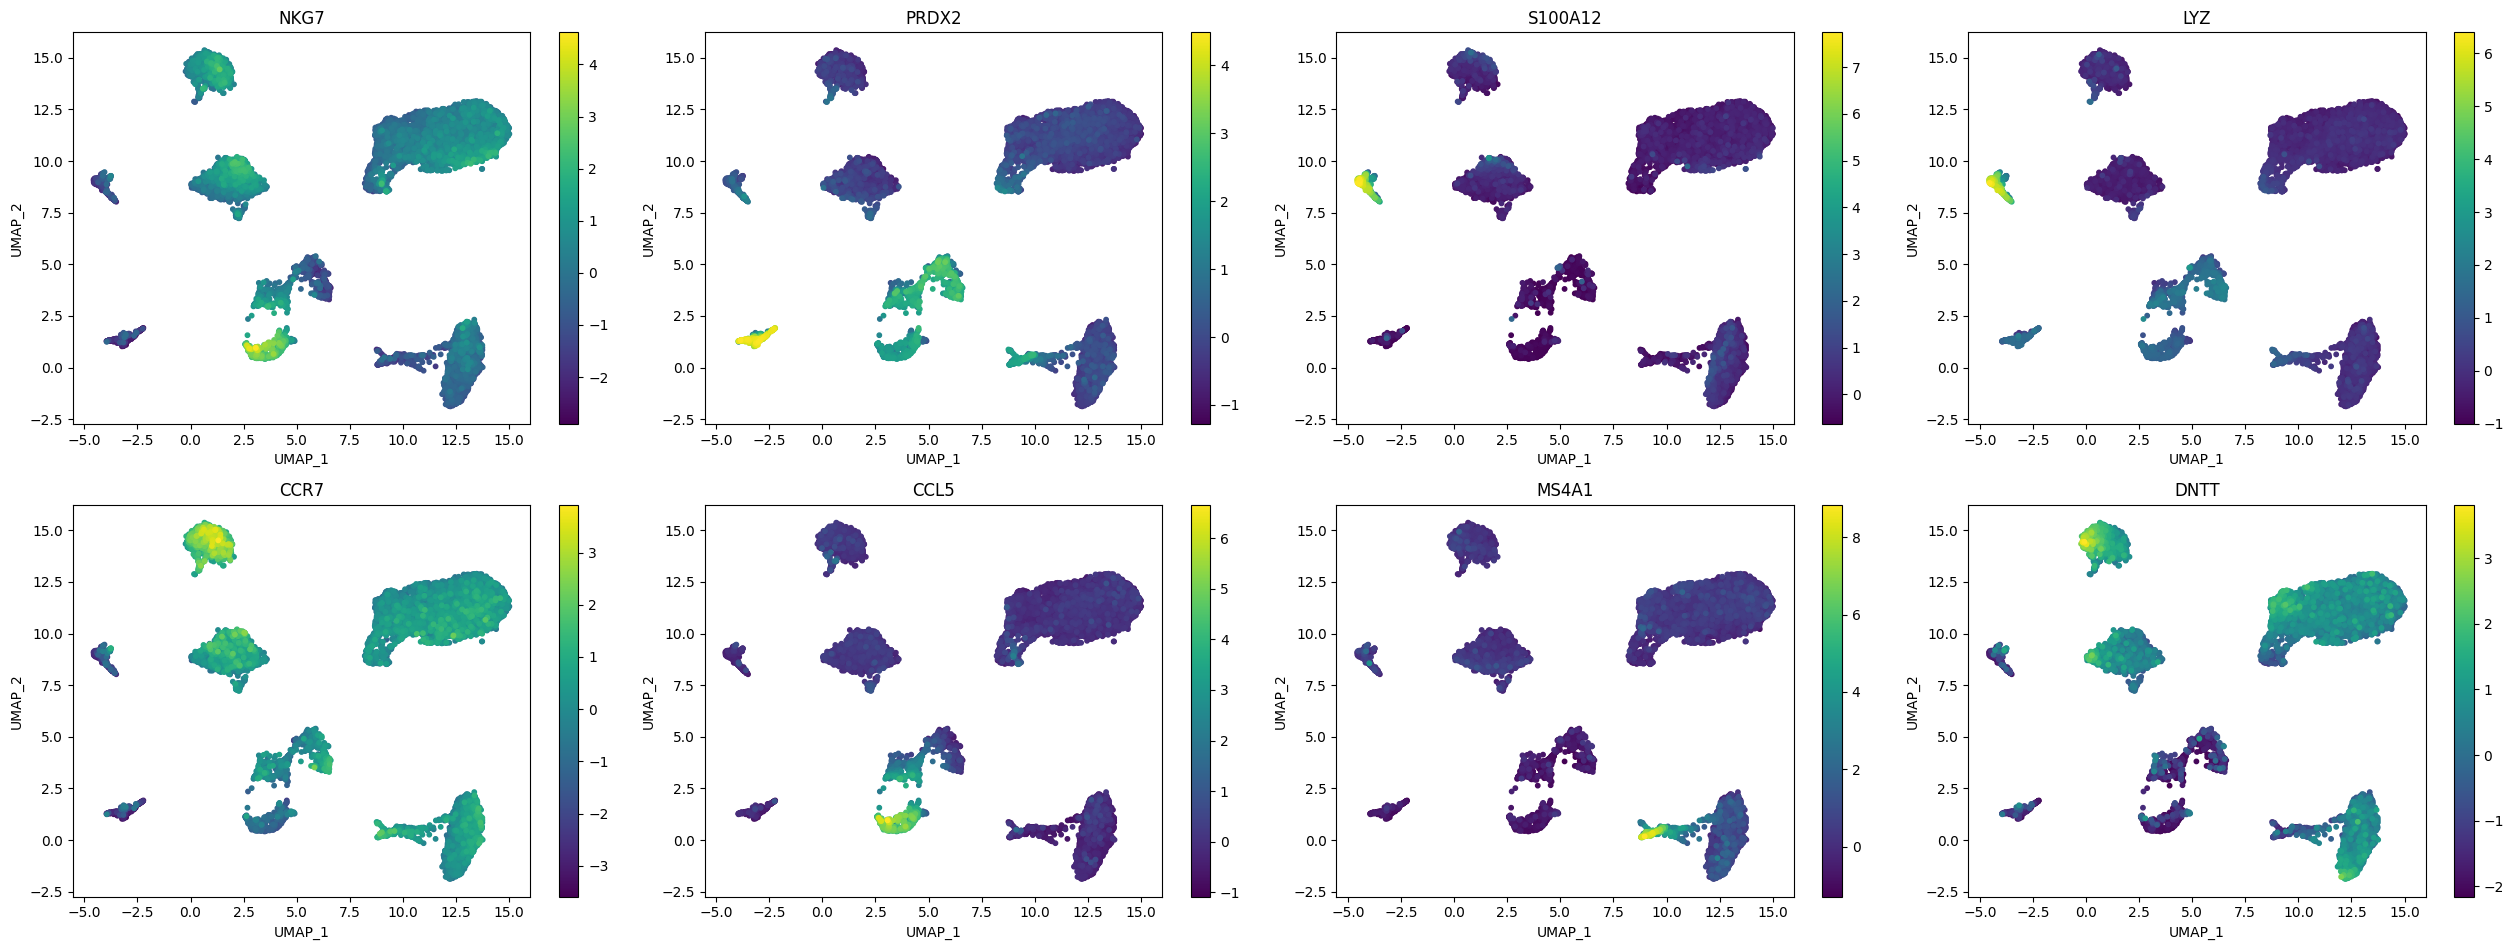

In [42]:
from pycisTopic.clust_vis import plot_imputed_features
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['NKG7',
              'PRDX2',
              'S100A12',
              'LYZ',
              'CCR7',
              'CCL5',
              'MS4A1',
              'DNTT'],
    scale=True,
    num_columns=4
)

In [43]:
gene_df = pd.DataFrame(gene_act.mtx)
gene_df.index = gene_act.feature_names
gene_df.columns = gene_act.cell_names

In [44]:
gene_df = gene_df.T
gene_df

OR8B4       ERFL     ATP2A2   TMEM229B  \
GTCTAGCTCCAGGATG-D0___D0  0.000000  10.853424  32.608330  17.771585   
CACGGTTTCGTTAGTT-D0___D0  0.339789   4.673539  20.961454  11.849875   
AAGTGAACATTGTGAG-D0___D0  0.000000   4.596695  18.394653  12.774079   
AAAGGGATCGTCCTAA-D0___D0  0.000000   8.171659  45.971354   6.951589   
ACAGCACCAAAGGTAA-D0___D0  0.339789   5.795240  21.140103  10.798746   
...                            ...        ...        ...        ...   
GGAAGTAAGGTGGGAG-Q3___Q3  0.357433   3.154870  17.105271  10.724560   
GCATTACGTAAGTGGC-Q3___Q3  0.000000   6.042879  32.785103   6.821714   
GAGGGTGAGGTATGGT-Q3___Q3  1.019368   4.005509  15.858481  10.933433   
TGGACCAAGGTTGTAA-Q3___Q3  0.357433   3.735491  13.541673  10.492031   
CGGCTAGCATCCTAGT-Q3___Q3  0.000000   3.535165  11.582163  11.574049   

                              SNRPD3      NOXA1    UGT1A5      REPS1  \
GTCTAGCTCCAGGATG-D0___D0   93.225037  55.000671  0.000000  17.744118   
CACGGTTTCGTTAGTT-D0___D0  106.312147  37.224289  2.843024  21.301809   
AAGTGAACATTGTGAG-D0___D0   94.977752  35.340537  0.000000  20.344191   
AAAGGGATCGTCCTAA-D0___D0  127.257928  67.019684  2.843024  19.541129   
ACAGCACCAAAGGTAA-D0___D0   89.966585  35.340537  2.843024  23.918876   
...                              ...        ...       ...        ...   
GGAAGTAAGGTGGGAG-Q3___Q3  117.245522  30.219850  0.000000  17.496494   
GCATTACGTAAGTGGC-Q3___Q3  170.779689  76.332330  0.000000  17.211866   
GAGGGTGAGGTATGGT-Q3___Q3  114.857293  26.558460  8.529073  21.309145   
TGGACCAAGGTTGTAA-Q3___Q3  102.113868  19.447907  0.000000  15.829235   
CGGCTAGCATCCTAGT-Q3___Q3  133.184509  24.780821  2.843024  19.359119   

                             MAPKBP1     PRR35  ...      ANAPC5      GFRA2  \
GTCTAGCTCCAGGATG-D0___D0  118.243581  4.968664  ...   82.926660   0.000000   
CACGGTTTCGTTAGTT-D0___D0  118.541771  5.625767  ...   63.477613  11.466102   
AAGTGAACATTGTGAG-D0___D0  102.034907  6.333853  ...   67.259077  14.668742   
AAAGGGATCGTCCTAA-D0___D0  115.118758  0.741315  ...  103.182989   1.601320   
ACAGCACCAAAGGTAA-D0___D0   96.214550  5.281474  ...   62.670330  13.067422   
...                              ...       ...  ...         ...        ...   
GGAAGTAAGGTGGGAG-Q3___Q3  102.094546  3.238762  ...   57.263691   6.597926   
GCATTACGTAAGTGGC-Q3___Q3  133.665138  2.052217  ...  106.422729   1.665535   
GAGGGTGAGGTATGGT-Q3___Q3   72.324917  4.592921  ...   62.670330  14.797173   
TGGACCAAGGTTGTAA-Q3___Q3   70.464315  3.831781  ...   47.810030  11.401886   
CGGCTAGCATCCTAGT-Q3___Q3   77.966361  3.902912  ...   70.498817  13.131637   

                             ZNF275       QPRT      ZBTB48       SMU1  \
GTCTAGCTCCAGGATG-D0___D0  12.207921   9.344244  103.027473  10.501781   
CACGGTTTCGTTAGTT-D0___D0   9.636568  13.534681   75.579221   7.460465   
AAGTGAACATTGTGAG-D0___D0   8.712596  11.911358  109.488756   8.371836   
AAAGGGATCGTCCTAA-D0___D0  11.594610  23.639434  115.600722   9.819845   
ACAGCACCAAAGGTAA-D0___D0  10.573280  15.306244   87.289313   8.221578   
...                             ...        ...         ...        ...   
GGAAGTAAGGTGGGAG-Q3___Q3  18.438548   7.526835   78.953722   7.333564   
GCATTACGTAAGTGGC-Q3___Q3  15.001405  14.122638  111.720646   8.880468   
GAGGGTGAGGTATGGT-Q3___Q3  10.256248   9.385401   81.037620   7.653739   
TGGACCAAGGTTGTAA-Q3___Q3  11.157051   7.407755   57.617437   6.530833   
CGGCTAGCATCCTAGT-Q3___Q3   7.869067   8.528154   69.327528   7.377023   

                           SLC14A2     ECHDC2      TUBB1     POLDIP3  
GTCTAGCTCCAGGATG-D0___D0  4.067066  20.794925  11.652938  216.771291  
CACGGTTTCGTTAGTT-D0___D0  2.791116  31.192388   8.958608  174.032851  
AAGTGAACATTGTGAG-D0___D0  2.687435  31.192388  12.623616  161.490240  
AAAGGGATCGTCCTAA-D0___D0  1.868850  27.726567  10.824873  297.185877  
ACAGCACCAAAGGTAA-D0___D0  2.809690  31.192388   8.885265  142.105149  
...                            ...        ...        ...         ...  


In [45]:
import scanpy as sc

In [46]:
cell_type_annot  = cistopic_obj.cell_data.cell_type_all
gene_an = sc.AnnData(gene_df, 
    gene_df.index.to_frame(), 
    gene_df.columns.to_frame())

In [47]:
gene_an.obs['cell_type_all'] = gene_an.obs.index.map(cell_type_annot)

In [48]:
def standardize_pro_b_cells(column):
    """
    Standardizes names in a column to 'Pro-B cells' if they contain 'pro-b cells'.
    """
    return column.str.replace(r'.*Pro-B cells.*', 'Pro-B cells', case=False, regex=True)
gene_an.obs['cell_type_all'] = standardize_pro_b_cells(gene_an.obs['cell_type_all'])


In [49]:
gene_an.obs['cell_type_all']

GTCTAGCTCCAGGATG-D0___D0                Naive_B_cells
CACGGTTTCGTTAGTT-D0___D0              Tumour_cells_D0
AAGTGAACATTGTGAG-D0___D0              Tumour_cells_D0
AAAGGGATCGTCCTAA-D0___D0             CD16pos_NK_cells
ACAGCACCAAAGGTAA-D0___D0              Tumour_cells_D0
                                      ...            
GGAAGTAAGGTGGGAG-Q3___Q3              Tumour_cells_Q3
GCATTACGTAAGTGGC-Q3___Q3    Tem_Trm_cytotoxic_T_cells
GAGGGTGAGGTATGGT-Q3___Q3              Tumour_cells_Q3
TGGACCAAGGTTGTAA-Q3___Q3              Tumour_cells_Q3
CGGCTAGCATCCTAGT-Q3___Q3              Tumour_cells_Q3
Name: cell_type_all, Length: 10268, dtype: object

In [50]:
gene_an.obs['cell_type_all'].value_counts()

Tumour_cells_Q1              4652
Tumour_cells_Q3              1734
Tumour_cells_D0              1666
Tumour_cells_Q2               991
CD16pos_NK_cells              317
Tem_Trm_cytotoxic_T_cells     297
Tcm_Naive_helper_T_cells      215
Classical_monocytes           190
Naive_B_cells                 134
Non-classical_monocytes        72
Name: cell_type_all, dtype: int64

In [ ]:
# reorder
desired_order = ['CD16pos_NK_cells', 'Non-classical_monocytes', 'Classical_monocytes',
                'Tcm_Naive_helper_T_cells','Tem_Trm_cytotoxic_T_cells','Naive_B_cells','Tumour_cells_D0',
               'Tumour_cells_Q1','Tumour_cells_Q2','Tumour_cells_Q3'] 
gene_an.obs['cell_type_all'] = gene_an.obs['cell_type_all'].astype('category')
gene_an.obs['cell_type_all'] = gene_an.obs['cell_type_all'].cat.reorder_categories(desired_order, ordered=True)


In [ ]:
dp = sc.pl.dotplot(gene_an, ['NKG7',
             # 'PRDX2',
              'S100A12',
              'LYZ',
              'CCR7',
              'CCL5',
              'MS4A1',
              'DNTT'], groupby='cell_type_all', standard_scale='var',show=False)


# Select the Axes object that contains the subplot of interest
ax = dp["mainplot_ax"]
# Loop through ticklabels and make them italic
for l in ax.get_xticklabels():
    l.set_style("italic")
plt.savefig("./figures/gene_activity_prediction_marker_genes.pdf", dpi=300, bbox_inches="tight")


/opt/venv/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


2025-07-10 13:21:57,948 fontTools.subset INFO     maxp pruned
2025-07-10 13:21:57,956 fontTools.subset INFO     cmap pruned
2025-07-10 13:21:57,957 fontTools.subset INFO     kern dropped
2025-07-10 13:21:57,957 fontTools.subset INFO     post pruned
2025-07-10 13:21:57,958 fontTools.subset INFO     FFTM dropped
2025-07-10 13:21:57,960 fontTools.subset INFO     GPOS pruned
2025-07-10 13:21:57,964 fontTools.subset INFO     GSUB pruned
2025-07-10 13:21:57,970 fontTools.subset INFO     glyf pruned
2025-07-10 13:21:57,971 fontTools.subset INFO     Added gid0 to subset
2025-07-10 13:21:57,971 fontTools.subset INFO     Added first four glyphs to subset
2025-07-10 13:21:57,971 fontTools.subset INFO     Closing glyph list over 'GSUB': 23 glyphs before
2025-07-10 13:21:57,972 fontTools.subset INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'G', 'K', 'L', 'M', 'N', 'R', 'S', 'T', 'Y', 'Z', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'space', 'two', 'zero']
2025-07-10 13:21:57,973

In [ ]:
# save gene_df object
gene_df.index = gene_df.index.str.split('__').str[0]
gene_df.to_csv('./figures/gene_activity_prediction.csv', index= True)

In [57]:
gene_df

OR8B4       ERFL     ATP2A2   TMEM229B      SNRPD3  \
GTCTAGCTCCAGGATG-D0  0.000000  10.853424  32.608330  17.771585   93.225037   
CACGGTTTCGTTAGTT-D0  0.339789   4.673539  20.961454  11.849875  106.312147   
AAGTGAACATTGTGAG-D0  0.000000   4.596695  18.394653  12.774079   94.977752   
AAAGGGATCGTCCTAA-D0  0.000000   8.171659  45.971354   6.951589  127.257928   
ACAGCACCAAAGGTAA-D0  0.339789   5.795240  21.140103  10.798746   89.966585   
...                       ...        ...        ...        ...         ...   
GGAAGTAAGGTGGGAG-Q3  0.357433   3.154870  17.105271  10.724560  117.245522   
GCATTACGTAAGTGGC-Q3  0.000000   6.042879  32.785103   6.821714  170.779689   
GAGGGTGAGGTATGGT-Q3  1.019368   4.005509  15.858481  10.933433  114.857293   
TGGACCAAGGTTGTAA-Q3  0.357433   3.735491  13.541673  10.492031  102.113868   
CGGCTAGCATCCTAGT-Q3  0.000000   3.535165  11.582163  11.574049  133.184509   

                         NOXA1    UGT1A5      REPS1     MAPKBP1     PRR35  \
GTCTAGCTCCAGGATG-D0  55.000671  0.000000  17.744118  118.243581  4.968664   
CACGGTTTCGTTAGTT-D0  37.224289  2.843024  21.301809  118.541771  5.625767   
AAGTGAACATTGTGAG-D0  35.340537  0.000000  20.344191  102.034907  6.333853   
AAAGGGATCGTCCTAA-D0  67.019684  2.843024  19.541129  115.118758  0.741315   
ACAGCACCAAAGGTAA-D0  35.340537  2.843024  23.918876   96.214550  5.281474   
...                        ...       ...        ...         ...       ...   
GGAAGTAAGGTGGGAG-Q3  30.219850  0.000000  17.496494  102.094546  3.238762   
GCATTACGTAAGTGGC-Q3  76.332330  0.000000  17.211866  133.665138  2.052217   
GAGGGTGAGGTATGGT-Q3  26.558460  8.529073  21.309145   72.324917  4.592921   
TGGACCAAGGTTGTAA-Q3  19.447907  0.000000  15.829235   70.464315  3.831781   
CGGCTAGCATCCTAGT-Q3  24.780821  2.843024  19.359119   77.966361  3.902912   

                     ...      ANAPC5      GFRA2     ZNF275       QPRT  \
GTCTAGCTCCAGGATG-D0  ...   82.926660   0.000000  12.207921   9.344244   
CACGGTTTCGTTAGTT-D0  ...   63.477613  11.466102   9.636568  13.534681   
AAGTGAACATTGTGAG-D0  ...   67.259077  14.668742   8.712596  11.911358   
AAAGGGATCGTCCTAA-D0  ...  103.182989   1.601320  11.594610  23.639434   
ACAGCACCAAAGGTAA-D0  ...   62.670330  13.067422  10.573280  15.306244   
...                  ...         ...        ...        ...        ...   
GGAAGTAAGGTGGGAG-Q3  ...   57.263691   6.597926  18.438548   7.526835   
GCATTACGTAAGTGGC-Q3  ...  106.422729   1.665535  15.001405  14.122638   
GAGGGTGAGGTATGGT-Q3  ...   62.670330  14.797173  10.256248   9.385401   
TGGACCAAGGTTGTAA-Q3  ...   47.810030  11.401886  11.157051   7.407755   
CGGCTAGCATCCTAGT-Q3  ...   70.498817  13.131637   7.869067   8.528154   

                         ZBTB48       SMU1   SLC14A2     ECHDC2      TUBB1  \
GTCTAGCTCCAGGATG-D0  103.027473  10.501781  4.067066  20.794925  11.652938   
CACGGTTTCGTTAGTT-D0   75.579221   7.460465  2.791116  31.192388   8.958608   
AAGTGAACATTGTGAG-D0  109.488756   8.371836  2.687435  31.192388  12.623616   
AAAGGGATCGTCCTAA-D0  115.600722   9.819845  1.868850  27.726567  10.824873   
ACAGCACCAAAGGTAA-D0   87.289313   8.221578  2.809690  31.192388   8.885265   
...                         ...        ...       ...        ...        ...   
GGAAGTAAGGTGGGAG-Q3   78.953722   7.333564  3.932234  24.260746   8.987143   
GCATTACGTAAGTGGC-Q3  111.720646   8.880468  1.084481  48.521492  14.781959   
GAGGGTGAGGTATGGT-Q3   81.037620   7.653739  3.300331  13.863283  10.436050   
TGGACCAAGGTTGTAA-Q3   57.617437   6.530833  6.538417  24.260746   7.097185   
CGGCTAGCATCCTAGT-Q3   69.327528   7.377023  2.848911  38.124030   8.513611   

                        POLDIP3  
GTCTAGCTCCAGGATG-D0  216.771291  
CACGGTTTCGTTAGTT-D0  174.032851  
AAGTGAACATTGTGAG-D0  161.490240  
AAAGGGATCGTCCTAA-D0  297.185877  
ACAGCACCAAAGGTAA-D0  142.105149  
...                         ...  
GGAAGTAAGGTGGGAG-Q3  169.956350  
GCATTACGTAAGTGGC-Q3  289.201047  
GAGGGTGAGGTATGGT-Q3  153.288926  
TGGACCAA

In [ ]:
# scale the data as in pycistopic to get scaled activties
import scipy 
from sklearn.preprocessing import scale

if scipy.sparse.issparse(gene_act.mtx):

    dense_matrix = gene_act.mtx.todense()
else:

    dense_matrix = gene_act.mtx

feature_data = scale(dense_matrix, axis=1)

In [70]:
feature_data_df = pd.DataFrame(feature_data)
feature_data_df.index = gene_act.feature_names
feature_data_df.columns = gene_act.cell_names
feature_data_df = feature_data_df.T
feature_data_df

OR8B4      ERFL    ATP2A2  TMEM229B    SNRPD3  \
GTCTAGCTCCAGGATG-D0___D0 -0.989817  3.301847  1.678294  3.735959 -0.459449   
CACGGTTTCGTTAGTT-D0___D0 -0.031014 -0.146089 -0.036599  0.943066  0.050097   
AAGTGAACATTGTGAG-D0___D0 -0.989817 -0.188963 -0.414536  1.378955 -0.391207   
AAAGGGATCGTCCTAA-D0___D0 -0.989817  1.805613  3.645873 -1.367143  0.865620   
ACAGCACCAAAGGTAA-D0___D0 -0.031014  0.479740 -0.010295  0.447316 -0.586317   
...                            ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  0.018772 -0.993398 -0.604386  0.412327  0.475787   
GCATTACGTAAGTGGC-Q3___Q3 -0.989817  0.617905  1.704322 -1.428396  2.560138   
GAGGGTGAGGTATGGT-Q3___Q3  1.886593 -0.518802 -0.787964  0.510839  0.382802   
TGGACCAAGGTTGTAA-Q3___Q3  0.018772 -0.669453 -1.129092  0.302658 -0.113363   
CGGCTAGCATCCTAGT-Q3___Q3 -0.989817 -0.781221 -1.417611  0.812977  1.096371   

                             NOXA1    UGT1A5     REPS1   MAPKBP1     PRR35  \
GTCTAGCTCCAGGATG-D0___D0  1.452761 -1.121043 -0.539564  1.046189  0.131129   
CACGGTTTCGTTAGTT-D0___D0  0.055724  0.185229  0.789538  1.063615  0.361673   
AAGTGAACATTGTGAG-D0___D0 -0.092319 -1.121043  0.431786  0.098937  0.610103   
AAAGGGATCGTCCTAA-D0___D0  2.397329  0.185229  0.131773  0.863571 -1.352028   
ACAGCACCAAAGGTAA-D0___D0 -0.092319  0.185229  1.767236 -0.241211  0.240878   
...                            ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3 -0.494751 -1.121043 -0.632072  0.102422 -0.475803   
GCATTACGTAAGTGGC-Q3___Q3  3.129205 -1.121043 -0.738405  1.947441 -0.892100   
GAGGGTGAGGTATGGT-Q3___Q3 -0.782497  2.797772  0.792279 -1.637346 -0.000699   
TGGACCAAGGTTGTAA-Q3___Q3 -1.341312 -1.121043 -1.254937 -1.746081 -0.267744   
CGGCTAGCATCCTAGT-Q3___Q3 -0.922201  0.185229  0.063777 -1.307654 -0.242788   

                          ...    ANAPC5     GFRA2    ZNF275      QPRT  \
GTCTAGCTCCAGGATG-D0___D0  ...  0.735894 -2.242599  0.501931 -0.856509   
CACGGTTTCGTTAGTT-D0___D0  ... -0.357078  0.488942 -0.566483 -0.065637   
AAGTGAACATTGTGAG-D0___D0  ... -0.144572  1.251899 -0.950400 -0.372011   
AAAGGGATCGTCCTAA-D0___D0  ...  1.874233 -1.861120  0.247096  1.841460   
ACAGCACCAAAGGTAA-D0___D0  ... -0.402445  0.870420 -0.177274  0.268715   
...                       ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  ... -0.706280 -0.670791  3.090797 -1.199513   
GCATTACGTAAGTGGC-Q3___Q3  ...  2.056295 -1.845823  1.662642  0.045330   
GAGGGTGAGGTATGGT-Q3___Q3  ... -0.402445  1.282495 -0.309002 -0.848741   
TGGACCAAGGTTGTAA-Q3___Q3  ... -1.237544  0.473644  0.065287 -1.221988   
CGGCTAGCATCCTAGT-Q3___Q3  ...  0.037490  0.885718 -1.300892 -1.010532   

                            ZBTB48      SMU1   SLC14A2    ECHDC2     TUBB1  \
GTCTAGCTCCAGGATG-D0___D0  1.568159  3.709257  0.324285 -0.445898  0.379327   
CACGGTTTCGTTAGTT-D0___D0 -0.121895 -0.180061 -0.584281  0.492379 -0.315392   
AAGTGAACATTGTGAG-D0___D0  1.965996  0.985425 -0.658109  0.492379  0.629611   
AAAGGGATCGTCCTAA-D0___D0  2.342324  2.837178 -1.240999  0.179620  0.165815   
ACAGCACCAAAGGTAA-D0___D0  0.599124  0.793271 -0.571055  0.492379 -0.334303   
...                            ...       ...       ...       ...       ...   
GGAAGTAAGGTGGGAG-Q3___Q3  0.085881 -0.342345  0.228275 -0.133139 -0.308034   
GCATTACGTAAGTGGC-Q3___Q3  2.103419  1.635878 -1.799524  2.056174  1.186128   
GAGGGTGAGGTATGGT-Q3___Q3  0.214192  0.067104 -0.221684 -1.071416  0.065559   
TGGACCAAGGTTGTAA-Q3___Q3 -1.227844 -1.368899  2.084059 -0.133139 -0.795350   
CGGCTAGCATCCTAGT-Q3___Q3 -0.506826 -0.286768 -0.543126  1.117897 -0.430132   

                           POLDIP3  
GTCTAGCTCCAGGATG-D0___D0  1.015295  
CACGGTTTCGTTAGTT-D0___D0  0.115918  
AAGTGAACATTGTGAG-D0___D0 -0.148025  
AAAGGGATCGTCCTAA-D0___D0  2.707520  
ACAGCACCAAAGGTAA-D0___D0 -0.555960  
...                            ...  
GGAAGTAAGGTGGGAG-Q3___Q3  0.030133  
GCATTACGTAAGTGGC-Q3___Q3  2.539489  
GAGGGTGA

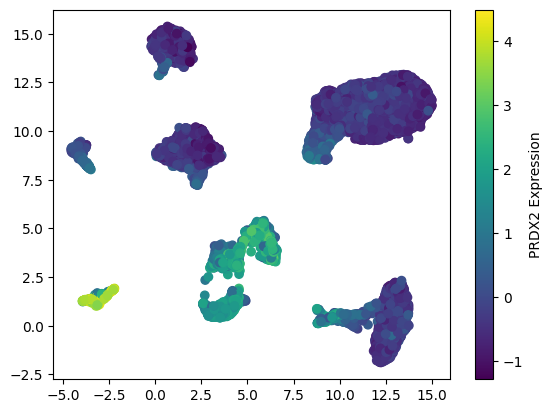

In [ ]:
# check 
scatter = plt.scatter(x = umap_coords['UMAP_1'], y = umap_coords['UMAP_2'], c = feature_data_df['PRDX2'])
plt.colorbar(scatter, label='PRDX2 Expression')

In [ ]:
# save for plotting
feature_data_df.index = feature_data_df.index.str.split('__').str[0]
feature_data_df.to_csv('./figures/gene_activity_prediction_scaled.csv', index= True)